# **Tugas 3, EDA dan Klasifikasi**

## **Kelompok 7**

1. Muhammad Daffa  Ma'arif (2305771)
2. Klara Ollivviera Augustine Gunawan (2306205)
3. Nashwa Nadria Futi (2308130)
4. Narendra Ridha Baihaqi (2308882)
5. Hafidz Tantowi (2308817)

## **Pendahuluan**

Dalam era digital saat ini, analisis data transaksi semakin penting untuk memahami pola dan perilaku yang mendasari berbagai jenis transaksi, baik di sektor finansial, e-commerce, maupun bisnis lainnya. Analisis eksplorasi data (Exploratory Data Analysis atau EDA) menjadi tahap awal yang krusial dalam memahami struktur data, mempelajari distribusi data, serta mengidentifikasi pola atau anomali yang mungkin berpengaruh terhadap hasil analisis lanjutan. EDA memungkinkan kita memperoleh gambaran umum tentang variabel-variabel dalam dataset dan bagaimana mereka saling berkaitan, sehingga dapat mendukung proses pengambilan keputusan berbasis data.

Pada tugas ini, kita bekerja dengan dataset "transact class" yang berisi data mengenai transaksi yang dikelompokkan dalam beberapa kelas. Tujuan dari analisis ini adalah untuk melakukan klasifikasi transaksi dengan menggunakan model prediktif yang akurat yang dialatih oleh dataset "transact train". Tahap-tahap analisis meliputi pembersihan data dari nilai-nilai yang tidak konsisten atau hilang, pengisian data yang hilang dengan metode yang sesuai, serta eksplorasi korelasi antar fitur untuk menemukan keterkaitan penting di antara variabel. Langkah ini membantu untuk memahami faktor-faktor apa saja yang berpotensi mempengaruhi kelas dari setiap transaksi.

Setelah EDA dan pembersihan data, beberapa model klasifikasi akan diterapkan untuk mengidentifikasi algoritma yang paling efektif dalam memprediksi kelas transaksi. Dengan membandingkan kinerja model-model ini, diharapkan dapat diperoleh model prediktif dengan akurasi yang optimal, yang nantinya dapat memberikan wawasan mendalam mengenai faktor-faktor yang memengaruhi transaksi dan memberikan dukungan dalam proses pengambilan keputusan berbasis data. Hasil dari tugas ini diharapkan tidak hanya meningkatkan pemahaman tentang data transaksi, tetapi juga memberikan kontribusi nyata dalam implementasi model prediktif yang akurat dan efektif.

## **Import Library**

In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings as warn
import xgboost as xgb
import matplotlib.pyplot as plt
import math
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, f1_score, accuracy_score, classification_report, confusion_matrix

warn.simplefilter(action='ignore', category=FutureWarning)

## **Load Dataset**

### **Transact_train**

dataset yang ditujukan untuk training model, yang nantinya model akan diaplikasikan pada dataset class

In [136]:
# Baca file teks ke dalam DataFrame
file_path = 'https://raw.githubusercontent.com/Schnee111/Classification-kel7/refs/heads/main/transact_train.txt'  # Ganti dengan nama file Anda
df = pd.read_csv(file_path, sep='|', header=0, na_values='?')  # `header=0` untuk membaca header dari baris pertama

# Tampilkan beberapa baris pertama untuk memastikan data diimpor dengan benar
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y


### **Transact_class**

dataset yang akan digunakan untuk prediksi kelas target (order), menggunakan model yang telah dilatih dengan dataset train

In [137]:
# Baca file teks ke dalam DataFrame
file_path = 'https://raw.githubusercontent.com/Schnee111/Classification-kel7/refs/heads/main/transact_class.txt'  # Ganti dengan nama file Anda
pred = pd.read_csv(file_path, sep='|', header=0, na_values='?')  # `header=0` untuk membaca header dari baris pertama


# Tampilkan beberapa baris pertama untuk memastikan data diimpor dengan benar
pred.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder
0,1,18,7,136.833,3,39.99,39.99,79.98,1,39.99,...,y,completely orderable,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
1,1,18,7,189.984,3,39.99,39.99,79.98,1,39.99,...,y,completely orderable,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
2,1,18,7,342.894,6,16.99,39.99,113.96,2,16.99,...,NaN,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
3,1,18,7,411.051,8,16.99,39.99,149.94,3,16.99,...,NaN,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
4,1,18,7,460.049,10,16.99,39.99,189.92,4,16.99,...,NaN,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0


### **real_class**

kelas asli dari data class, digunakan unuk membandingkan hasil prediksi model pada data class dengan kelas aslinya, menghitung akurasi dan f1-score

In [138]:
realclass = pd.read_csv("https://raw.githubusercontent.com/Schnee111/Classification-kel7/refs/heads/main/realclass_t1.txt", sep='|', header=0)
realclass.head()

,sessionNo,prediction
0,1,1
1,2,1
2,3,1
3,4,0
4,5,0


## **Deskripsi Field**

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        426248 non-null  float64
 6   cMaxPrice        426248 non-null  float64
 7   cSumPrice        426248 non-null  float64
 8   bCount           429013 non-null  int64  
 9   bMinPrice        423883 non-null  float64
 10  bMaxPrice        423883 non-null  float64
 11  bSumPrice        423883 non-null  float64
 12  bStep            237680 non-null  float64
 13  onlineStatus     268634 non-null  object 
 14  availability     263758 non-null  object 
 15  customerNo       277915 non-null  float64
 16  maxVal           275273 non-null  floa

Berikut adalah penjelasan field pada dataset:

1. **sessionNo**: Nomor urut yang menunjukkan sesi. Ini adalah angka alami yang tidak memiliki nilai yang hilang. Digunakan untuk melacak sesi individu.

2. **startHour**: Jam mulai sesi. Merupakan bilangan asli antara 0 hingga 23 (menandakan setiap jam dalam sehari). Tidak ada nilai yang hilang.

3. **startWeekday**: Hari dalam seminggu saat sesi dimulai. Digunakan angka alami antara 1 (Senin) hingga 7 (Minggu). Kolom ini tidak memiliki nilai yang hilang.

4. **duration**: Durasi sesi dalam detik. Merupakan angka desimal nonnegatif yang menunjukkan durasi sesi. Tidak ada nilai yang hilang.

5. **cCount**: Jumlah produk yang diklik selama sesi. Ini adalah angka alami dengan nilai yang tidak hilang. Mengukur seberapa banyak produk yang dilihat atau diklik.

6. **cMinPrice**: Harga terendah dari produk yang diklik selama sesi. Ini adalah angka desimal nonnegatif dan bisa memiliki nilai yang hilang.

7. **cMaxPrice**: Harga tertinggi dari produk yang diklik selama sesi. Sama seperti cMinPrice, ini adalah angka desimal nonnegatif dan bisa memiliki nilai yang hilang.

8. **cSumPrice**: Jumlah total harga produk yang diklik selama sesi. Ini adalah angka desimal nonnegatif dan bisa memiliki nilai yang hilang.

9. **bCount**: Jumlah produk yang dimasukkan ke keranjang belanja selama sesi. Ini adalah angka alami yang menunjukkan seberapa banyak produk yang dipilih untuk dibeli. Tidak ada nilai yang hilang.

10. **bMinPrice**: Harga terendah dari produk yang dimasukkan ke dalam keranjang belanja. Ini adalah angka desimal nonnegatif dengan nilai yang bisa hilang.

11. **bMaxPrice**: Harga tertinggi dari produk yang dimasukkan ke keranjang belanja. Seperti bMinPrice, kolom ini bisa memiliki nilai yang hilang.

12. **bSumPrice**: Jumlah total harga dari semua produk yang dimasukkan ke keranjang belanja. Ini adalah angka desimal nonnegatif dengan kemungkinan nilai yang hilang.

13. **bStep**: Langkah dalam proses pembelian yang dilalui oleh pelanggan. Merupakan angka alami antara 1 hingga 5, dengan kemungkinan nilai yang hilang.

14. **onlineStatus**: Menunjukkan apakah pelanggan sedang online selama sesi, dengan nilai 'y' untuk ya dan 'n' untuk tidak. Bisa ada nilai yang hilang.

15. **availability**: Status ketersediaan pengiriman produk. Ini adalah kolom bertipe string dan bisa memiliki nilai yang hilang.

16. **customerID**: Nomor identifikasi unik untuk pelanggan. Ini adalah string dan mungkin memiliki nilai yang hilang.

17. **maxVal**: Harga maksimum yang dapat diterima untuk pembelian oleh pelanggan. Ini adalah angka alami dengan kemungkinan nilai yang hilang.

18. **customerScore**: Evaluasi pelanggan dari perspektif toko. Merupakan angka alami yang mungkin memiliki nilai yang hilang.

19. **accountLifetime**: Durasi akun pelanggan dalam bulan. Ini adalah angka alami yang menunjukkan lama waktu akun tersebut aktif, dengan kemungkinan nilai yang hilang.

20. **payments**: Jumlah pembayaran yang telah dilakukan oleh pelanggan. Merupakan angka alami dan mungkin memiliki nilai yang hilang.

21. **age**: Usia pelanggan, berupa angka alami. Kolom ini mungkin memiliki nilai yang hilang.

22. **address**: Jenis alamat pelanggan, dengan nilai 1 untuk Mr, 2 untuk Mrs, dan 3 untuk Perusahaan. Ini bisa memiliki nilai yang hilang.

23. **lastOrder**: Jumlah hari yang telah berlalu sejak pesanan terakhir pelanggan. Merupakan angka alami dengan kemungkinan nilai yang hilang.

24. **order**: Hasil dari sesi, apakah pelanggan melakukan pembelian ('y' untuk pembelian, 'n' untuk tidak membeli). Tidak ada nilai yang hilang.

## **Analisis Awal**

### **Asumsi** 

Setelah kami mengeksplorasi dan melihat isi dari data transact_train, kami berasumsi bahwa dataset ini merupakan data time series yang terurut, artinya data merupakan kumpulan record aktivitas tiap pelanggan dalam rentang waktu tertentu yang terurut berdasarkan waktunya, dengan aktivitas tiap sesi yang diinformasikan dalam beberapa baris pada dataset ini (1 sesi tidak hanya 1 data), yang dimana dalam satu sesi itu pelanggan melakukan berbagai aktivitas seperti klik produk, memasukannya ke dalam keranjang, hingga membelinya.

dengan adanya beberapa baris untuk satu sesi itu, kami juga beranggapan bahwa itu bukanlah satu sesi aktivitas pelanggan, tetapi beberapa sesi aktivitas yang digabungkan menjadi 1 sesi dalam rentang waktu tertentu, sehingga informasi yang kita butuhkan adalah record terbarunya, misal session 1 memiliki 3 baris data dan record ketiga adalah yang terbaru, maka record ketiga itulah yang kami butuhkan.

dengan asumsi tersebut, kami berencana untuk mengambil record terbaru data untuk setiap sesi, di group berdasarkan field sessionNo, mengambil record terakhir(terbaru), dan jika ada missing values, maka gunakan informasi yang ada pada record sebelumnya.

meskipun begitu, kami harus membuktikan atau memvalidasi asumsi kami terlebih dahulu sebelum melakukan modifikasi lebih lanjut pada data.

pertama, kami membandingkan data asli dengan data yang telah disort berdasarkan hari dan jamnya untuk memastikan asumsi kami bahwa data merupakan time series, dan terurut

In [140]:
# Sort data by startWeekday and startHour
sorted_data = df.sort_values(by=['startWeekday', 'startHour'])

# Check if the data is ordered correctly
is_ordered = sorted_data['startWeekday'].equals(df['startWeekday']) and sorted_data['startHour'].equals(df['startHour'])
print("Apakah data terurut?", is_ordered)

Apakah data terurut? True


berikut adalah 5 data asli paling awal dan akhir pada dataset

In [141]:
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y


In [142]:
df.tail()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
429008,49998,18,7,5988.882,77,9.99,149.99,5253.28,3,49.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n
429009,49999,18,7,675.114,6,59.00,199.99,509.96,1,89.99,...,NaN,25038.0,NaN,NaN,NaN,0.0,24.0,1.0,4.0,n
429010,49999,18,7,715.341,7,59.00,649.99,1159.95,1,89.99,...,completely orderable,25038.0,NaN,NaN,NaN,0.0,24.0,1.0,4.0,n
429011,50000,18,7,0.000,1,6.99,6.99,6.99,1,6.99,...,NaN,47.0,300.0,537.0,5.0,0.0,53.0,1.0,34.0,n
429012,50000,18,7,82.943,1,6.99,6.99,6.99,1,6.99,...,completely orderable,47.0,300.0,537.0,5.0,0.0,53.0,1.0,34.0,n


berdasarkan sesi, hari dan jam nya data dipastikan terurut, dari hari jumat (5) pukul 6 hingga minggu (7) pukul 18, juga dari session 1 hingga 50000

berikutnya kami memastikan bahwa tidak ada penurunan data seperti pada duration, cCount, dll pada setiap sesi. memperkuat asumsi kami bahwa data merupakan terurut, sehingga kami bisa mengambil record terakhir atau terbaru nya saja

In [143]:
# Kolom yang ingin diperiksa, sesuaikan dengan kolom yang relevan
columns_to_check = ['duration', 'bCount', 'cCount', 'cMaxPrice', 'cSumPrice', 'bMaxPrice', 'bSumPrice']  # Anda dapat menambahkan kolom lainnya

# Memeriksa apakah kolom bertambah atau tidak berkurang dalam setiap sesi (abaikan NaN)
def check_not_decreasing(data, columns):
    decreased_sessions = []  # List untuk menyimpan sessionNo yang mengalami penurunan
    for col in columns:
        # Mengelompokkan data berdasarkan sessionNo
        for session_no, group in data.groupby('sessionNo'):
            # Memeriksa apakah ada penurunan dalam kolom pada setiap sessionNo
            valid_data = group[col].shift(1) > group[col]  # Menemukan penurunan dalam sesi yang sama
            if valid_data.any():  # Jika ada penurunan
                decreased_sessions.append(session_no)
                print(f"Penurunan data pada kolom '{col}' ditemukan pada sessionNo {session_no}:")
                print(group.loc[valid_data, ['sessionNo', col]])  # Menampilkan sessionNo dan nilai yang menurun
                
    return decreased_sessions

# Memeriksa apakah data tidak berkurang
decreased_sessions = check_not_decreasing(df, columns_to_check)

# Output hasil pemeriksaan
if decreased_sessions:
    print(f"Terdapat penurunan pada sessionNo: {sorted(set(decreased_sessions))}")
else:
    print("Data tidak berkurang pada sesi manapun.")


Data tidak berkurang pada sesi manapun.


kesimpulannya adalah satu sessionNo ada pada beberapa baris dan memiliki kelas target yang sama untuk sesi yang sama, dan asumsi kami bahwa data merupakan time series dan terurut adalah valid, sehingga kami berencana untuk grouping berdasarkan sesi dan mengambil record terbaru

dipastikan juga bahwa field numerik seperti duration dan bCount atau cCount tidaklah berkurang seiring bertambahnya baris untuk tiap sesi, justru bertambah karena record sesi sebelumnya ditimpa oleh record baru yang berarti ada update data

maka, jika ada data yang kosong pada record terbaru, kami mengisinya dengan data yang ada pada record sebeulmnya untuk tiap sesi

### **Cek Missing dan Zero values**

In [144]:
null_values = df.isnull().sum()
null_values = null_values[null_values > 0]

print("Jumlah missing values per field:")
print(null_values)

Jumlah missing values per field:
cMinPrice            2765
cMaxPrice            2765
cSumPrice            2765
bMinPrice            5130
bMaxPrice            5130
bSumPrice            5130
bStep              191333
onlineStatus       160379
availability       165255
customerNo         151098
maxVal             153740
customerScore      153740
accountLifetime    153740
payments           151098
age                151396
address            151098
lastOrder          151098
dtype: int64


In [145]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
zero_values = (df[numerical_features] == 0).sum()
zero_values = zero_values[zero_values > 0]

print("Kolom dengan zero values dan jumlahnya:")
print(zero_values)

Kolom dengan zero values dan jumlahnya:
startHour           3630
duration           20351
cCount              1207
cMinPrice           4806
cMaxPrice             60
cSumPrice             60
bCount              3151
bMinPrice           2677
bMaxPrice            115
bSumPrice            115
maxVal              1260
customerScore         69
accountLifetime     1975
payments           20301
dtype: int64


terlihat bahwa banyak missing & zero values yang harus dianalisis dan ditangani lebih lanjut, meskipun begitu kami akan mencoba untuk membuat model prediksi awal dengan data yang mungkin 'kotor' tersebut

### **Grouping Session**

memastikan bahwa tidak ada order yang berbeda untuk setiap sesi

In [146]:
order_check = df.groupby('sessionNo')['order'].nunique()

print("Jumlah sessionNo yang memiliki order berbeda :", order_check[order_check > 1].sum())

Jumlah sessionNo yang memiliki order berbeda : 0


memastikan bahwa 1 session merupakan aktivitas 1 customer saja

In [147]:
# data train
order_check = df.groupby('sessionNo')['customerNo'].nunique()

print("Jumlah sessionNo yang memiliki customerNo berbeda :", order_check[order_check > 1].sum())

Jumlah sessionNo yang memiliki customerNo berbeda : 0


In [148]:
# data pred
order_check = pred.groupby('sessionNo')['customerNo'].nunique()

print("Jumlah sessionNo yang memiliki customerNo berbeda :", order_check[order_check > 1].sum())

Jumlah sessionNo yang memiliki customerNo berbeda : 0


Ambil record terbaru setiap sesi, jika ada nilai kosong maka isi berdasarkan data yang ada pada record sebelumnya, untuk bStep sendiri diisi dengan nilai maxnya di tiap sesi

In [149]:
# Urutkan data berdasarkan sessionNo dan duration untuk mengambil record terbaru
df_sorted = df.sort_values(by=['sessionNo', 'duration'], ascending=[True, False])

# Reset indeks untuk memudahkan pengisian
df_sorted = df_sorted.reset_index(drop=True)

# Mengisi nilai yang hilang dengan forward fill berdasarkan group sessionNo
df_sorted['cMinPrice'] = df_sorted.groupby('sessionNo')['cMinPrice'].ffill()
df_sorted['cMaxPrice'] = df_sorted.groupby('sessionNo')['cMaxPrice'].ffill()
df_sorted['cSumPrice'] = df_sorted.groupby('sessionNo')['cSumPrice'].ffill()
df_sorted['bMinPrice'] = df_sorted.groupby('sessionNo')['bMinPrice'].ffill()
df_sorted['bMaxPrice'] = df_sorted.groupby('sessionNo')['bMaxPrice'].ffill()
df_sorted['bSumPrice'] = df_sorted.groupby('sessionNo')['bSumPrice'].ffill()
df_sorted['onlineStatus'] = df_sorted.groupby('sessionNo')['onlineStatus'].ffill()
df_sorted['availability'] = df_sorted.groupby('sessionNo')['availability'].ffill()
df_sorted['customerNo'] = df_sorted.groupby('sessionNo')['customerNo'].ffill()
df_sorted['maxVal'] = df_sorted.groupby('sessionNo')['maxVal'].ffill()
df_sorted['customerScore'] = df_sorted.groupby('sessionNo')['customerScore'].ffill()
df_sorted['accountLifetime'] = df_sorted.groupby('sessionNo')['accountLifetime'].ffill()
df_sorted['payments'] = df_sorted.groupby('sessionNo')['payments'].ffill()
df_sorted['age'] = df_sorted.groupby('sessionNo')['age'].ffill()
df_sorted['address'] = df_sorted.groupby('sessionNo')['address'].ffill()
df_sorted['lastOrder'] = df_sorted.groupby('sessionNo')['lastOrder'].ffill()

# Mengisi bStep dengan nilai maksimum pada setiap sesi
df_sorted['bStep'] = df_sorted.groupby('sessionNo')['bStep'].transform('max')

# Ambil record terbaru yang telah diisi untuk setiap sessionNo
df_latest = df_sorted.groupby('sessionNo').first().reset_index()

# Hanya ambil record terbaru dengan nilai yang telah diisi
df = df_sorted.loc[df_sorted['sessionNo'].isin(df_latest['sessionNo'])].drop_duplicates(subset='sessionNo', keep='first')


tampilkan data yang telah dimodifikasi

In [150]:
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,94.469,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
8,3,6,5,341.613,11,9.99,29.99,109.95,2,9.99,...,completely orderable,3.0,1800.0,475.0,302.0,12.0,45.0,1.0,11.0,y
13,4,6,5,42.812,4,4.99,4.99,19.96,1,4.99,...,completely not orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n
15,5,6,5,2816.046,45,12.99,179.95,1093.72,4,19.99,...,completely orderable,4.0,800.0,503.0,18.0,1.0,46.0,1.0,40.0,y


lakukan hal yang sama pada data class, yang akan kita gunakan untuk prediksi kelas target

In [151]:
# Urutkan data berdasarkan sessionNo dan duration untuk mengambil record terbaru
pred_sorted = pred.sort_values(by=['sessionNo', 'duration'], ascending=[True, False])

# Reset indeks untuk memudahkan pengisian
pred_sorted = pred_sorted.reset_index(drop=True)

# Mengisi nilai yang hilang dengan forward fill berdasarkan group sessionNo
pred_sorted['cMinPrice'] = pred_sorted.groupby('sessionNo')['cMinPrice'].ffill()
pred_sorted['cMaxPrice'] = pred_sorted.groupby('sessionNo')['cMaxPrice'].ffill()
pred_sorted['cSumPrice'] = pred_sorted.groupby('sessionNo')['cSumPrice'].ffill()
pred_sorted['bMinPrice'] = pred_sorted.groupby('sessionNo')['bMinPrice'].ffill()
pred_sorted['bMaxPrice'] = pred_sorted.groupby('sessionNo')['bMaxPrice'].ffill()
pred_sorted['bSumPrice'] = pred_sorted.groupby('sessionNo')['bSumPrice'].ffill()
pred_sorted['onlineStatus'] = pred_sorted.groupby('sessionNo')['onlineStatus'].ffill()
pred_sorted['availability'] = pred_sorted.groupby('sessionNo')['availability'].ffill()
pred_sorted['customerNo'] = pred_sorted.groupby('sessionNo')['customerNo'].ffill()
pred_sorted['maxVal'] = pred_sorted.groupby('sessionNo')['maxVal'].ffill()
pred_sorted['customerScore'] = pred_sorted.groupby('sessionNo')['customerScore'].ffill()
pred_sorted['accountLifetime'] = pred_sorted.groupby('sessionNo')['accountLifetime'].ffill()
pred_sorted['payments'] = pred_sorted.groupby('sessionNo')['payments'].ffill()
pred_sorted['age'] = pred_sorted.groupby('sessionNo')['age'].ffill()
pred_sorted['address'] = pred_sorted.groupby('sessionNo')['address'].ffill()
pred_sorted['lastOrder'] = pred_sorted.groupby('sessionNo')['lastOrder'].ffill()

# Mengisi bStep dengan nilai maksimum pada setiap sesi
pred_sorted['bStep'] = pred_sorted.groupby('sessionNo')['bStep'].transform('max')

# Ambil record terbaru yang telah diisi untuk setiap sessionNo
pred_latest = pred_sorted.groupby('sessionNo').first().reset_index()

# Hanya ambil record terbaru dengan nilai yang telah diisi
pred = pred_sorted.loc[pred_sorted['sessionNo'].isin(pred_latest['sessionNo'])].drop_duplicates(subset='sessionNo', keep='first')


### **Encoding Categorical Field**

Ada beberapa field kategori yang perlu diencode, agar memudahkan identifikasi oleh model.
kami melakukan mapping pada field true false seperti online status dan order, dan one hot encoding pada field availability dan address

#### **Dataset Train**

In [152]:
# Melakukan mapping untuk field 'onlineStatus' dan 'order' dengan nilai 'y' menjadi 1 dan 'n' menjadi 0
df['onlineStatus'] = df['onlineStatus'].map({'y': 1, 'n': 0})
df['order'] = df['order'].map({'y': 1, 'n': 0})


# one hot encoding untuk field 'availability' dan 'address'
df = pd.get_dummies(df, columns=['availability'])
df = pd.get_dummies(df, columns=['address'])

In [153]:
df.drop(columns=['availability_mainly not determinable'], inplace=True)

#### **Dataset class**

In [154]:
# Melakukan mapping untuk field 'onlineStatus' dan 'order' dengan nilai 'y' menjadi 1 dan 'n' menjadi 0
pred['onlineStatus'] = pred['onlineStatus'].map({'y': 1, 'n': 0})

# one hot encoding untuk field 'availability' dan 'address'
pred = pd.get_dummies(pred, columns=['availability'])
pred = pd.get_dummies(pred, columns=['address'])

### **Train dan Test model awal**

setelah melakukan grouping, atau hanya mengambil 1 record terbaru untuk setiap sesi, kami mencoba melatih model lagi dengan data yang lebih 'rapi' ini, meskipun masih banyak missing & zero values yang kami abaikan, ini hanya patokan sebagai pembanding dengan model yang akan kami latih nanti oleh data dan fitur yang kami analisis dan proses lebih lanjut

#### **Features selection**

field identitas seperti sessionNo dan customerNo tidak disertakan sebagai fitur yang akan digunakan untuk prediksi

In [155]:
# 1. Menentukan field numerikal, mengabaikan field identitas
identity_fields = ['sessionNo', 'customerNo']  # Tambahkan field identitas lainnya jika diperlukan

numerical_features = [
    col for col in df.select_dtypes(include=['float64', 'int64', 'bool']).columns 
    if col not in identity_fields
]

# Pastikan 'order' tidak termasuk dalam fitur yang digunakan untuk prediksi
numerical_features.remove('order')

#### **Data Split**

split data untuk training dan test dengan pembagian 80:20, karena data sudah dipastikan time series dan terurut, maka kami membaginya secara terurut, 80% data awal untuk train, dan 20% sisanya untuk test

In [156]:
# 3. Menentukan fitur (X) dan target (y)
X = df[numerical_features]
y = df['order']

train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#### **Train Model**

melatih beberapa model untuk prediksi pada data class

##### **Random Forest Classifier**

In [157]:
# 5. Membangun dan melatih model RandomForest
rf_model = RandomForestClassifier(
    n_estimators=100,  # Jumlah pohon dalam hutan
    max_depth=6,        # Kedalaman maksimal pohon
    random_state=42,    # Menetapkan nilai acak untuk reprodusibilitas
)

rf_model.fit(X_train, y_train)

# 6. Memprediksi kelas target
y_pred_rf = rf_model.predict(X_test)

In [158]:
# 7. Evaluasi model menggunakan F1 Score
accuracy = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)  # average='weighted' untuk mempertimbangkan ketidakseimbangan kelas
class_report = classification_report(y_test, y_pred_rf)

print(f"F1 Score: {f1_rf}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

F1 Score: 0.8934502705728681
Accuracy: 0.8858
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      4768
           1       0.87      0.92      0.89      5232

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.89      0.89     10000



##### **XGBoost Classifier**

In [159]:
# 5. Membangun dan melatih model XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,  # Jumlah pohon dalam boosting
    max_depth=6,       # Kedalaman maksimal pohon
    random_state=42,   # Menetapkan nilai acak untuk reprodusibilitas
)

xgb_model.fit(X_train, y_train)

# 6. Memprediksi kelas target
y_pred_xgb = xgb_model.predict(X_test)

In [160]:
# 7. Evaluasi model menggunakan F1 Score
accuracy = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

print(f"F1 Score: {f1_xgb}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

F1 Score: 0.8934331797235023
Accuracy: 0.889
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4768
           1       0.90      0.89      0.89      5232

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



keduanya menunjukkan hasil yang mirip, yaitu f-1 score 0.89

selanjutnya akan kami uji prediksi model yang telah dilatih ini pada data class

#### **Test model pada class**

duplikat data yang akan diprediksi, untuk setiap model

In [161]:
pred_rf = pred.copy()
pred_xgb =  pred.copy()

kami mencoba beberapa model untuk uji pada data

##### **Random Forest Classifier**

In [162]:
# 1. Menentukan field numerikal, mengabaikan field identitas
identity_fields = ['sessionNo', 'customerNo']  # Tambahkan field identitas lainnya jika diperlukan

pred_features = [
    col for col in pred_rf.select_dtypes(include=['float64', 'int64', 'bool']).columns 
    if col not in identity_fields
]

# 2. Menggunakan model untuk memprediksi
pred_rf['predicted_order'] = rf_model.predict(pred_rf[pred_features])

f1_score: 0.8877700860079715
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2669
           1       0.91      0.87      0.89      2442

    accuracy                           0.90      5111
   macro avg       0.90      0.89      0.89      5111
weighted avg       0.90      0.90      0.90      5111



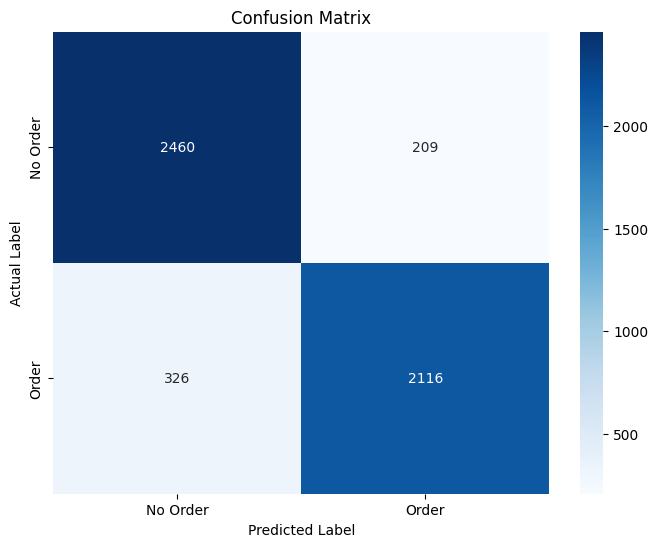

In [163]:
# 2. Menggabungkan pred dan realclass berdasarkan field sesi
comparison = pd.merge(pred_rf, realclass, on='sessionNo', suffixes=('_predicted', '_actual'))

# 3. Hitung akurasi dan metrik evaluasi lainnya
f1_rf = f1_score(comparison['predicted_order'], comparison['prediction'])
class_report = classification_report(comparison['predicted_order'], comparison['prediction'])

print(f"f1_score: {f1_rf}")
print("Classification Report:")
print(class_report)

# 4. Confusion Matrix
conf_matrix = confusion_matrix(comparison['predicted_order'], comparison['prediction'])

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Order', 'Order'], yticklabels=['No Order', 'Order'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

##### **XGBoost Classifier**

In [164]:
# 1. Menentukan field numerikal, mengabaikan field identitas
identity_fields = ['sessionNo', 'customerNo']  # Tambahkan field identitas lainnya jika diperlukan

pred_features = [
    col for col in pred_xgb.select_dtypes(include=['float64', 'int64', 'bool']).columns 
    if col not in identity_fields
]

# 2. Menggunakan model untuk memprediksi
pred_xgb['predicted_order'] = xgb_model.predict(pred_xgb[pred_features])

f1_score: 0.8905172413793103
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2796
           1       0.89      0.89      0.89      2315

    accuracy                           0.90      5111
   macro avg       0.90      0.90      0.90      5111
weighted avg       0.90      0.90      0.90      5111



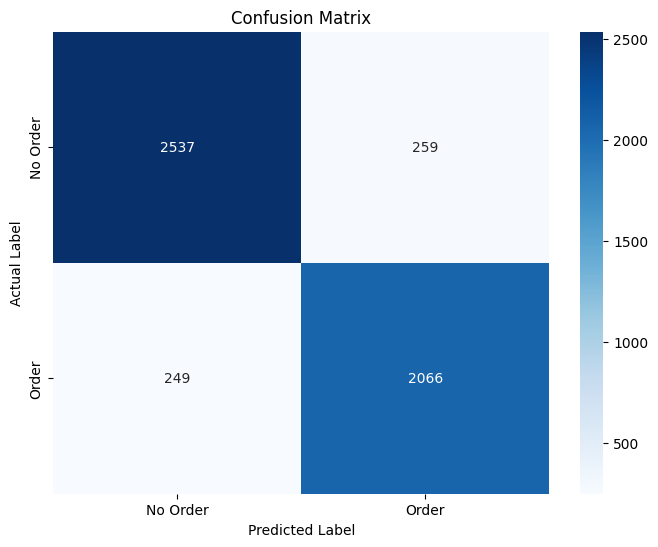

In [165]:
# 2. Menggabungkan pred dan realclass berdasarkan field sesi
comparison = pd.merge(pred_xgb, realclass, on='sessionNo', suffixes=('_predicted', '_actual'))

# 3. Hitung akurasi dan metrik evaluasi lainnya
f1_xgb = f1_score(comparison['predicted_order'], comparison['prediction'])
class_report = classification_report(comparison['predicted_order'], comparison['prediction'])

print(f"f1_score: {f1_xgb}")
print("Classification Report:")
print(class_report)

# 4. Confusion Matrix
conf_matrix = confusion_matrix(comparison['predicted_order'], comparison['prediction'])

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Order', 'Order'], yticklabels=['No Order', 'Order'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#### **Kesimpulan uji model**

setelah mencoba kedua model tersebut, hasilnya cukup memuaskan dengan f1-score sekitar 0.89 untuk kedua model

model XGBoost sedikit lebih unggul daripada random forest, meskipun hanya dibawah 1% tetapi XGBoost lebih baik dalam memprediksi kelas target 'no order'

## **Pra-processing Data**

### **Feature Engineering**

Disini kami ingin melakukan seleksi fitur yang paling relevan atau berkontribusi terhadap prediksi kelas target, penentuan fitur-fitur tersebut dilakukan berdasarkan beberapa metode.

#### ***RFE Feature selection***

In [166]:
from sklearn.feature_selection import RFE

model = XGBClassifier(n_estimators=100, max_depth=6, random_state=42)

# Melakukan RFE
selector = RFE(model, n_features_to_select=10)  # Memilih 10 fitur terbaik
selector = selector.fit(X_train, y_train)

# Menampilkan fitur yang dipilih
selected_features = X_train.columns[selector.support_]
print("Fitur yang dipilih:", selected_features)

Fitur yang dipilih: Index(['duration', 'bCount', 'bMinPrice', 'bMaxPrice', 'bStep', 'onlineStatus',
       'maxVal', 'accountLifetime', 'payments',
       'availability_completely orderable'],
      dtype='object')


#### ***Feature Importance dengan Random Forest***

In [167]:
# Mendapatkan feature importance
importance = rf_model.feature_importances_

# Menampilkan feature importance
feature_importance = pd.Series(importance, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
bStep                                       0.325248
availability_completely orderable           0.183666
onlineStatus                                0.110755
accountLifetime                             0.064453
payments                                    0.046446
maxVal                                      0.043443
duration                                    0.042559
lastOrder                                   0.034693
age                                         0.025342
bCount                                      0.024447
bSumPrice                                   0.015766
cCount                                      0.015620
bMaxPrice                                   0.013636
cSumPrice                                   0.012691
bMinPrice                                   0.012175
cMaxPrice                                   0.008595
address_2.0                                 0.008494
cMinPrice                                   0.004848
customerScore             

#### ***Feature Importance dengan CatBoost***

In [168]:
# Melatih model CatBoost
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
catboost_model.fit(X_train, y_train)

# Menampilkan feature importance
importances = catboost_model.get_feature_importance()
feature_importance = pd.Series(importances, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
bStep                                       24.333190
availability_completely orderable           22.598712
duration                                     8.486512
bCount                                       4.681634
payments                                     4.606572
maxVal                                       4.129328
bSumPrice                                    3.971156
cCount                                       3.527068
age                                          3.219450
bMinPrice                                    2.720430
customerScore                                2.702930
bMaxPrice                                    2.699330
lastOrder                                    2.372892
onlineStatus                                 2.028387
accountLifetime                              1.847240
cSumPrice                                    1.493465
cMaxPrice                                    1.454210
startHour                                    1.260090
startWee

#### ***Feature Importance dengan XGB***

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

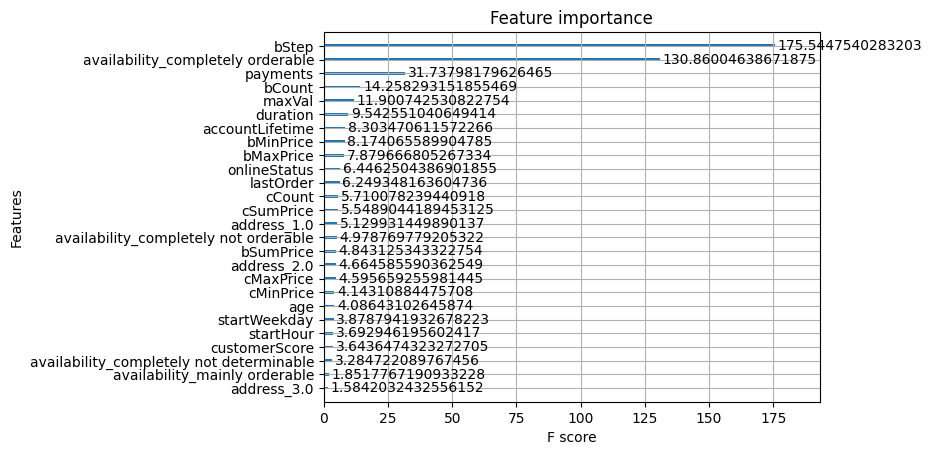

In [169]:
xgb.plot_importance(xgb_model, importance_type='gain')

#### ***Heatmap Correlation***

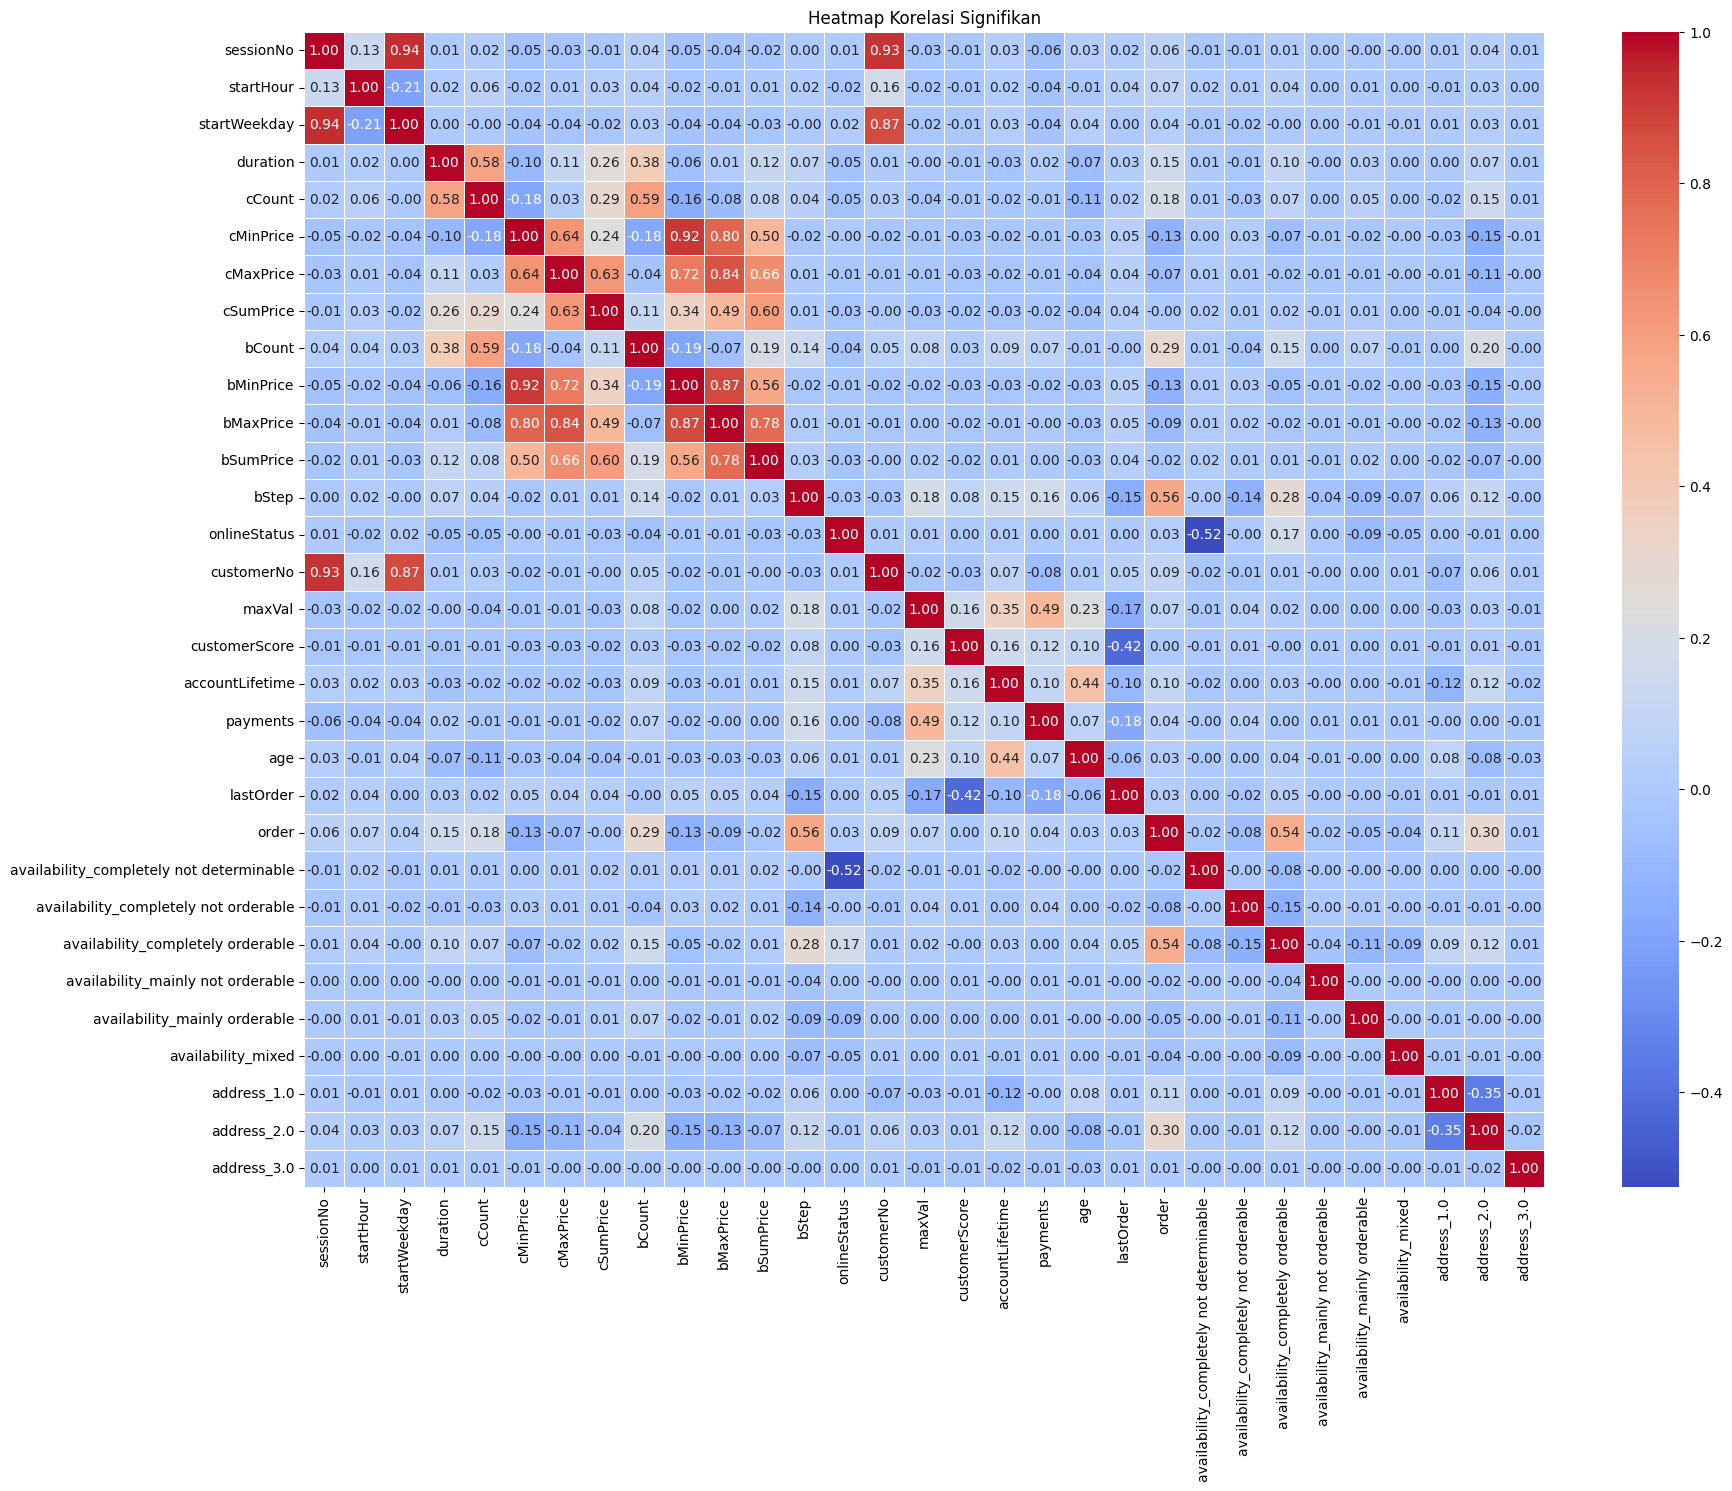

In [170]:
# Membuat mask untuk korelasi rendah
corr_matrix = df.corr()

# Menampilkan heatmap dengan mask
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Signifikan')
plt.show()

#### ***Kesimpulan***

berdasarkan beberapa metode pengecekan feature yang relevan atau paling berkontribusi terhadap hasil prediksi kelas target, kami mendapat beberapa poin penting :

- **Multikolinearitas**

    terdapat multikolinearitas pada field cCount, cMin, cMax, cSum, bCount, bMin, bMax, dan bSum. kedelapan fitur ini saling terkait, misal apabila cMin rendah, maka bMin juga relatif rendah, sehingga kami memutuskan hanya mempertahankan fitur bCount, bMin, bMax, dan bSum karena barang yang masuk keranjang lebih berkontribusi pada hasil prediksi daripada hanya barang yang diklik, keputusan ini diperkuat juga dengan hasil dari beberapa metode analisis feature importance tadi

- **Bstep dan availabilitiy completely orderable**

    kedua fitur ini dinilai paling berkontribusi terhadap hasil prediksi, dari semua metode analisis tadi, kedua fitur ini paling dominan diantara yang lain, sehingga kami akan mempertahankan fitur ini

- **maxVal, age, payments, dan account lifetime**

    keempat fitur ini juga dinilai cukup berkontribusi terhadap hasil prediksi, terlihat dari hasil beberapa metode analisis tadi, setidaknya masuk di 10 fitur teratas, bahkan 5 teratas pada beberapa metode

- **onlineStatus, address 1 dan address 2**

    fitur2 ini juga terlihat cukup berkontribusi pada hasil prediksi, meskipun tidak menonjol, kami memutuskan untuk mempertahankannya

- **sessionNo, weekdays, dan starthour**

    ketiga fitur ini berguna untuk identitas sesi, dan juga keperluan plotting time series



### **cek ulang missing dan zero values**

#### ***data train***

In [171]:
null_values = df.isnull().sum()
null_values = null_values[null_values > 0]

print("Jumlah missing values per field:")
print(null_values)

Jumlah missing values per field:
cMinPrice            325
cMaxPrice            325
cSumPrice            325
bMinPrice            682
bMaxPrice            682
bSumPrice            682
bStep              11084
onlineStatus       10973
customerNo         22639
maxVal             22954
customerScore      22954
accountLifetime    22954
payments           22639
age                22667
lastOrder          22639
dtype: int64


In [172]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
zero_values = (df[numerical_features] == 0).sum()
zero_values = zero_values[zero_values > 0]

print("Kolom dengan zero values dan jumlahnya:")
print(zero_values)

Kolom dengan zero values dan jumlahnya:
startHour            472
duration            1245
cCount               179
cMinPrice            364
cMaxPrice              6
cSumPrice              6
bCount               478
bMinPrice            178
bMaxPrice             18
bSumPrice             18
onlineStatus         343
maxVal               123
customerScore          5
accountLifetime      224
payments            2633
order              26822
dtype: int64


#### ***data class***

In [173]:
null_values = pred.isnull().sum()
null_values = null_values[null_values > 0]

print("Jumlah missing values per field:")
print(null_values)

Jumlah missing values per field:
cMinPrice            32
cMaxPrice            32
cSumPrice            32
bMinPrice            69
bMaxPrice            69
bSumPrice            69
bStep              1211
onlineStatus       1194
customerNo         2538
maxVal             2570
customerScore      2570
accountLifetime    2570
payments           2538
age                2542
lastOrder          2538
dtype: int64


In [174]:
numerical_features = pred.select_dtypes(include=['float64', 'int64']).columns.tolist()
zero_values = (pred[numerical_features] == 0).sum()
zero_values = zero_values[zero_values > 0]

print("Kolom dengan zero values dan jumlahnya:")
print(zero_values)

Kolom dengan zero values dan jumlahnya:
startHour          221
duration           170
cCount              19
cMinPrice           38
bCount              48
bMinPrice           22
bMaxPrice            1
bSumPrice            1
onlineStatus        24
maxVal              13
customerScore        2
accountLifetime     12
payments           321
dtype: int64


### **Zero Values pada Field duration**

karena tidak ada missing values pada field furation, dan terdapat 1245 data dengan nilai 0 pada field duration, kami akan mengeceknya terlebih dahulu

In [175]:
print(len(df[(df['duration'] == 0)]))
df[(df['duration'] == 0)].head(20)

1245


,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,order,availability_completely not determinable,availability_completely not orderable,availability_completely orderable,availability_mainly not orderable,availability_mainly orderable,availability_mixed,address_1.0,address_2.0,address_3.0
23,6,6,5,0.0,1,129.99,129.99,129.99,1,129.99,...,0,False,False,False,False,False,False,False,False,False
41,8,6,5,0.0,1,59.99,59.99,59.99,1,59.99,...,0,False,False,False,False,False,False,False,True,False
380,51,6,5,0.0,1,169.00,169.00,169.00,1,169.00,...,0,False,False,False,False,False,False,False,False,False
424,59,6,5,0.0,1,129.99,129.99,129.99,1,129.99,...,0,False,False,False,False,False,False,False,False,False
664,93,6,5,0.0,1,99.99,99.99,99.99,1,99.99,...,0,False,False,False,False,False,False,False,False,False
730,105,6,5,0.0,1,5.00,5.00,5.00,1,5.00,...,0,False,False,False,False,False,False,False,True,False
760,112,6,5,0.0,1,169.00,169.00,169.00,1,169.00,...,0,False,False,False,False,False,False,False,False,False
799,122,6,5,0.0,1,5.99,5.99,5.99,1,5.99,...,0,False,False,False,False,False,False,False,False,False
980,144,6,5,0.0,1,99.99,99.99,99.99,1,99.99,...,0,False,False,False,False,False,False,False,False,False
1296,190,6,5,0.0,1,99.99,99.99,99.99,1,99.99,...,0,False,False,False,False,False,False,False,False,False


In [176]:
df[(df['duration'] == 0)].tail(20)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,order,availability_completely not determinable,availability_completely not orderable,availability_completely orderable,availability_mainly not orderable,availability_mainly orderable,availability_mixed,address_1.0,address_2.0,address_3.0
414528,48396,17,7,0.0,1,99.99,99.99,99.99,1,99.99,...,0,False,False,False,False,False,False,False,False,False
414973,48447,17,7,0.0,1,319.99,319.99,319.99,1,319.99,...,0,False,False,False,False,False,False,False,True,False
415122,48469,17,7,0.0,1,49.99,49.99,49.99,1,49.99,...,0,False,False,False,False,False,False,False,False,False
415911,48561,17,7,0.0,1,99.99,99.99,99.99,1,99.99,...,0,False,False,False,False,False,False,False,False,False
418299,48809,17,7,0.0,1,6.99,6.99,6.99,1,6.99,...,0,False,False,False,False,False,False,False,False,False
418946,48885,17,7,0.0,1,99.99,99.99,99.99,1,99.99,...,0,False,False,False,False,False,False,False,False,False
419413,48939,17,7,0.0,1,99.99,99.99,99.99,1,99.99,...,0,False,False,False,False,False,False,False,False,False
419649,48964,17,7,0.0,1,99.99,99.99,99.99,1,99.99,...,0,False,False,False,False,False,False,False,False,False
419800,48978,17,7,0.0,1,6.99,6.99,6.99,1,6.99,...,0,False,False,False,False,False,False,False,False,False
420059,49000,18,7,0.0,1,169.00,169.00,169.00,1,169.00,...,0,False,False,False,False,False,False,False,False,False


karena data dengan durasi 0 masih memiliki informasi seperti count, maka kami dapat mengimputasi berdasarkan nilai tersebut

##### ***data train***

In [177]:
df['cCount'].describe()

count    50000.000000
mean        20.198200
std         28.451429
min          0.000000
25%          4.000000
50%         10.000000
75%         24.000000
max        200.000000
Name: cCount, dtype: float64

mengklasifikasikan rentang cCount untuk imputasi duration

In [178]:
# Misalkan df adalah DataFrame Anda
bins = [0, 4, 10, 24, 200]  # Rentang yang diusulkan
labels = ['Very Low', 'Low', 'Medium', 'High']

# Mengklasifikasikan nilai cCount
df['count_class'] = pd.cut(df['cCount'], bins=bins, labels=labels, right=True)

# Menghitung rata-rata durasi berdasarkan kelas count
durasi_by_count_class = df.groupby('count_class')['duration'].mean().reset_index()

# Menampilkan hasil
print(durasi_by_count_class)


  count_class     duration
0    Very Low   293.880670
1         Low   830.778721
2      Medium  1506.327829
3        High  3432.052079


imputasi duration dengan nilai mean berdasarkan rentang count

In [179]:
# Mengisi nilai durasi yang nol dengan rata-rata berdasarkan kelas count
for count_class in df['count_class'].unique():
    mean_duration = df.loc[df['count_class'] == count_class, 'duration'].mean()
    df.loc[(df['duration'] == 0) & (df['count_class'] == count_class), 'duration'] = mean_duration


lalu menghapus kolom bantu dan pengecekan sisa durasi

In [180]:
# Menghapus kolom count_class
df.drop(columns=['count_class'], inplace=True)
print(len(df[df['duration'] == 0]))

45


sisanya adalah data yang memiliki missing values di hampir semua field penting

In [181]:
df[(df['duration'] == 0)].tail(20)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,order,availability_completely not determinable,availability_completely not orderable,availability_completely orderable,availability_mainly not orderable,availability_mainly orderable,availability_mixed,address_1.0,address_2.0,address_3.0
194820,23250,13,6,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
206762,24648,14,6,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
214415,25459,15,6,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
214624,25479,15,6,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
235119,27777,16,6,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
285266,33307,20,6,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
313702,36569,5,7,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
321253,37480,8,7,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
324794,37870,9,7,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False
327845,38245,9,7,0.0,0,NaN,NaN,NaN,0,NaN,...,0,False,False,True,False,False,False,False,False,False


cek anomali dimana durasi 0 tetapi melakukan order

In [182]:
df[(df['duration'] == 0) & (df['order'] == 1)]

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,order,availability_completely not determinable,availability_completely not orderable,availability_completely orderable,availability_mainly not orderable,availability_mainly orderable,availability_mixed,address_1.0,address_2.0,address_3.0
1378,199,6,5,0.0,0,NaN,NaN,NaN,0,NaN,...,1,False,False,True,False,False,False,False,False,False


ada satu data anomali, karena field lainnya juga banyak missing values, maka kami hapus saja

In [183]:
df = df[~((df['duration'] == 0) & (df['order'] == 1))]

dan kami memutuskan untuk mengisi missing values di field numerik lainnya dengan 0 untuk duration 0

In [184]:
# Daftar kolom yang ingin diisi
columns_to_fill = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice']

# Mengisi nilai dengan 0 untuk kolom terkait jika duration = 0
pred.loc[pred['duration'] == 0, columns_to_fill] = 0


##### ***data class***

In [185]:
pred['cCount'].describe()

count    5111.000000
mean       23.253962
std        31.690505
min         0.000000
25%         4.000000
50%        11.000000
75%        30.000000
max       200.000000
Name: cCount, dtype: float64

mengklasifikasikan rentang cCount untuk imputasi duration

In [186]:
bins = [0, 4, 11, 30, 200]  # Rentang yang diusulkan
labels = ['Very Low', 'Low', 'Medium', 'High']

# Mengklasifikasikan nilai cCount
pred['count_class'] = pd.cut(pred['cCount'], bins=bins, labels=labels, right=True)

# Menghitung rata-rata durasi berdasarkan kelas count
durasi_by_count_class = pred.groupby('count_class')['duration'].mean().reset_index()

# Menampilkan hasil
print(durasi_by_count_class)

  count_class     duration
0    Very Low   251.088719
1         Low   853.573930
2      Medium  1638.515360
3        High  3548.731323


imputasi duration dengan nilai mean berdasarkan rentang count

In [187]:
# Mengisi nilai durasi yang nol dengan rata-rata berdasarkan kelas count
for count_class in pred['count_class'].unique():
    mean_duration = pred.loc[pred['count_class'] == count_class, 'duration'].mean()
    pred.loc[(pred['duration'] == 0) & (pred['count_class'] == count_class), 'duration'] = mean_duration


lalu menghapus kolom bantu dan pengecekan sisa durasi

In [188]:
# Menghapus kolom count_class
pred.drop(columns=['count_class'], inplace=True)

### **Imputasi bCount yang memiliki zero values**

selanjutnya kami mengimputasi bCount yang masih memiliki zero values, cCount kami abaikan karena nanti akan didrop

pertama, kami melakukan pengecekan terlebih dahulu terhadap zero values pada field bCount

#### ***data train***

In [189]:
print("jumlah bCount 0 dengan bMin atau bMax lebih dari 0 (ada informasi) :", len(df[(df['bCount'] == 0) & ((df['bMaxPrice'] > 0) | (df['bMinPrice'] > 0))]))

jumlah bCount 0 dengan bMin atau bMax lebih dari 0 (ada informasi) : 0


In [190]:
print("jumlah bCount 0 dengan informasi NaN pada field pendukungnya :", len(df[(df['bCount'] == 0) & (df['bMaxPrice'].isnull()) & (df['bMinPrice'].isnull())]))

jumlah bCount 0 dengan informasi NaN pada field pendukungnya : 477


nampak ada beberapa anomali, maka kami akan mengisi data data tersebut dengan median berdasarkan rentang durasi

In [191]:
df['duration'].describe()

count    49999.000000
mean      1472.811094
std       2310.961953
min          0.000000
25%        251.270000
50%        686.792000
75%       1726.337500
max      21580.092000
Name: duration, dtype: float64

inisiasi rentang durasi

In [192]:
# Membuat rentang durasi
bins = [0, 250, 700, 1750, np.inf]  # Rentang durasi berdasarkan analisis
labels = ['0-250', '251-700', '701-1750', '>1750']  # Label rentang
df['durasi_range'] = pd.cut(df['duration'], bins=bins, labels=labels)

imputasi berdasarkan median tiap rentang durasi

In [193]:
# Mengisi nilai bCount yang memiliki 0 values dan order == 1
condition = (df['bCount'] == 0) & (df['order'] == 1)
for durasi_group in labels:
    median_value = df.loc[df['durasi_range'] == durasi_group, 'bCount'].median()
    df.loc[condition & (df['durasi_range'] == durasi_group), 'bCount'] = median_value

# Drop kolom rentang durasi (opsional jika tidak diperlukan lagi)
df = df.drop(columns=['durasi_range'])

#### ***data class***

In [194]:
print("jumlah bCount 0 dengan bMin atau bMax lebih dari 0 (ada informasi) :", len(pred[(pred['bCount'] == 0) & ((pred['bMaxPrice'] > 0) | (pred['bMinPrice'] > 0))]))

jumlah bCount 0 dengan bMin atau bMax lebih dari 0 (ada informasi) : 0


In [195]:
print("jumlah bCount 0 dengan informasi NaN pada field pendukungnya :", len(pred[(pred['bCount'] == 0) & (pred['bMaxPrice'].isnull()) & (pred['bMinPrice'].isnull())]))

jumlah bCount 0 dengan informasi NaN pada field pendukungnya : 46


nampak ada beberapa anomali, maka kami akan mengisi data data tersebut dengan median berdasarkan rentang durasi

In [196]:
pred['duration'].describe()

count     5111.000000
mean      1536.228068
std       2178.971488
min          0.000000
25%        251.088719
50%        793.389000
75%       1966.657000
max      21320.113000
Name: duration, dtype: float64

imputasi berdasarkan median di rentang durasi diatas 50%

In [197]:
# Imputasi hanya untuk durasi_range '>800'
median_value = pred.loc[pred['duration'] > 800, 'bCount'].median()
pred.loc[(pred['bCount'] == 0) & (pred['duration'] > 800), 'bCount'] = median_value

### **Imputasi field price** 

kami akan melakukan imputasi pada field price (bMin, bMax, bSum) dengan nilai median dari tiap rentang bCount nya

#### **data train**

pertama, kami harus menentukan terlebih dahulu rentang bCount berdasarkan statistik deskriptifnya

In [198]:
df['bCount'].describe()

count    49999.000000
mean         3.174763
std          3.552335
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        108.000000
Name: bCount, dtype: float64

In [199]:
# Menentukan rentang bCount
bins = [0, 1, 4, 11, np.inf]  # Rentang bCount berdasarkan statistik
labels = ['0', '1-3', '4-10', '>10']  # Label untuk rentang
df['bCount_range'] = pd.cut(df['bCount'], bins=bins, labels=labels, right=False)

lalu lakukan imputasi terhadap nilai null pada field-field tersebut

In [200]:
# Kolom yang akan diisi
columns_to_fill = ['bMinPrice', 'bMaxPrice', 'bSumPrice']

# Mengisi nilai kosong
for col in columns_to_fill:
    # Isi 0 hanya jika bCount = 0
    df.loc[df['bCount'] == 0, col] = 0

    # Pastikan bCount > 0 tidak memiliki nilai 0 atau NaN
    df[col] = df.groupby('bCount_range')[col].transform(
        lambda x: x.replace(0, np.nan).fillna(x.median())
    )

# Drop kolom rentang bCount (opsional jika tidak diperlukan lagi)
df = df.drop(columns=['bCount_range'], errors='ignore')

#### **data class**

In [201]:
pred['bCount'].describe()

count    5111.000000
mean        3.363138
std         3.646944
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        43.000000
Name: bCount, dtype: float64

In [202]:
# Menentukan rentang bCount
bins = [0, 1, 4, 11, np.inf]  # Rentang bCount berdasarkan statistik
labels = ['0', '1-3', '4-10', '>10']  # Label untuk rentang
pred['bCount_range'] = pd.cut(pred['bCount'], bins=bins, labels=labels, right=False)

lalu lakukan imputasi terhadap nilai null pada field-field tersebut

In [203]:
# Kolom yang akan diisi
columns_to_fill = ['bMinPrice', 'bMaxPrice', 'bSumPrice']

# Mengisi nilai kosong
for col in columns_to_fill:
    # Isi 0 hanya jika bCount = 0
    pred.loc[pred['bCount'] == 0, col] = 0

    # Pastikan bCount > 0 tidak memiliki nilai 0 atau NaN
    pred[col] = pred.groupby('bCount_range')[col].transform(
        lambda x: x.replace(0, np.nan).fillna(x.median())
    )

# Drop kolom rentang bCount (opsional jika tidak diperlukan lagi)
pred = pred.drop(columns=['bCount_range'], errors='ignore')

### **Imputasi dengan KNNImputer**

kemudian, kami melakukan imputasi pada sisa field menggunakan KNNImputer

data tipe kategori dan numerik dipisah terlebih dahulu, transform data numerik karena data cukup skewed.
lakukan imputasi, dan terakhir inverse transform data numerik tadi menjadi seperti semula

#### ***data train***

In [204]:
# Encode categorical columns (bStep, onlineStatus)
categorical_cols = ['bStep', 'onlineStatus']

# Separate columns for imputing
numerical_cols = ['age', 'maxVal', 'payments', 'accountLifetime']
impute_cols = numerical_cols + categorical_cols

# Scale numerical data for consistent distance calculation
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=10)  # Start with 10 neighbors

# Perform imputations
df[impute_cols] = knn_imputer.fit_transform(df[impute_cols])

# Inverse scale numerical data back to original values
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

In [205]:
df['bStep'] = df['bStep'].round()
df['onlineStatus'] = df['onlineStatus'].round()

#### ***data class***

In [206]:
# Encode categorical columns (bStep, onlineStatus)
categorical_cols = ['bStep', 'onlineStatus']

# Separate columns for imputing
numerical_cols = ['age', 'maxVal', 'payments', 'accountLifetime']
impute_cols = numerical_cols + categorical_cols

# Scale numerical data for consistent distance calculation
scaler = StandardScaler()
pred[numerical_cols] = scaler.fit_transform(pred[numerical_cols])

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=10)  # Start with 10 neighbors

# Perform imputations
pred[impute_cols] = knn_imputer.fit_transform(pred[impute_cols])

# Inverse scale numerical data back to original values
pred[numerical_cols] = scaler.inverse_transform(pred[numerical_cols])

In [207]:
pred['bStep'] = pred['bStep'].round()
pred['onlineStatus'] = pred['onlineStatus'].round()

### **Drop Fitur yang kurang relevan**

Drop fitur yang dianggap kurang relevan berdasarkan hasil analisis pada feature engineering tadi

In [208]:
df = df[['sessionNo', 'startHour', 'startWeekday', 'duration', 'bCount', 'bMinPrice', 'age', 'accountLifetime',
          'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'maxVal', 'payments', 'order', 'availability_completely orderable', 'address_1.0', 'address_2.0']]

pred = pred[['sessionNo', 'startHour', 'startWeekday', 'duration', 'bCount', 'bMinPrice', 'age', 'accountLifetime',
          'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'maxVal', 'payments', 'availability_completely orderable', 'address_1.0', 'address_2.0']]

### **cek ulang missing dan zero values**

#### ***data train***

In [209]:
null_values = df.isnull().sum()
null_values = null_values[null_values > 0]

print("Jumlah missing values per field:")
print(null_values)

Jumlah missing values per field:
Series([], dtype: int64)


In [210]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
zero_values = (df[numerical_features] == 0).sum()
zero_values = zero_values[zero_values > 0]

print("Kolom dengan zero values dan jumlahnya:")
print(zero_values)

Kolom dengan zero values dan jumlahnya:
startHour            472
duration              44
bCount               393
bMinPrice            393
accountLifetime      224
bMaxPrice            393
bSumPrice            393
onlineStatus         351
maxVal               123
payments            2633
order              26822
dtype: int64


#### ***data class***

In [211]:
null_values = pred.isnull().sum()
null_values = null_values[null_values > 0]

print("Jumlah missing values per field:")
print(null_values)

Jumlah missing values per field:
Series([], dtype: int64)


In [212]:
numerical_features = pred.select_dtypes(include=['float64', 'int64']).columns.tolist()
zero_values = (pred[numerical_features] == 0).sum()
zero_values = zero_values[zero_values > 0]

print("Kolom dengan zero values dan jumlahnya:")
print(zero_values)

Kolom dengan zero values dan jumlahnya:
startHour          221
duration             2
bCount              25
bMinPrice           25
accountLifetime     12
bMaxPrice           25
bSumPrice           25
onlineStatus        24
maxVal              13
payments           321
dtype: int64


### **Analisis outlier**

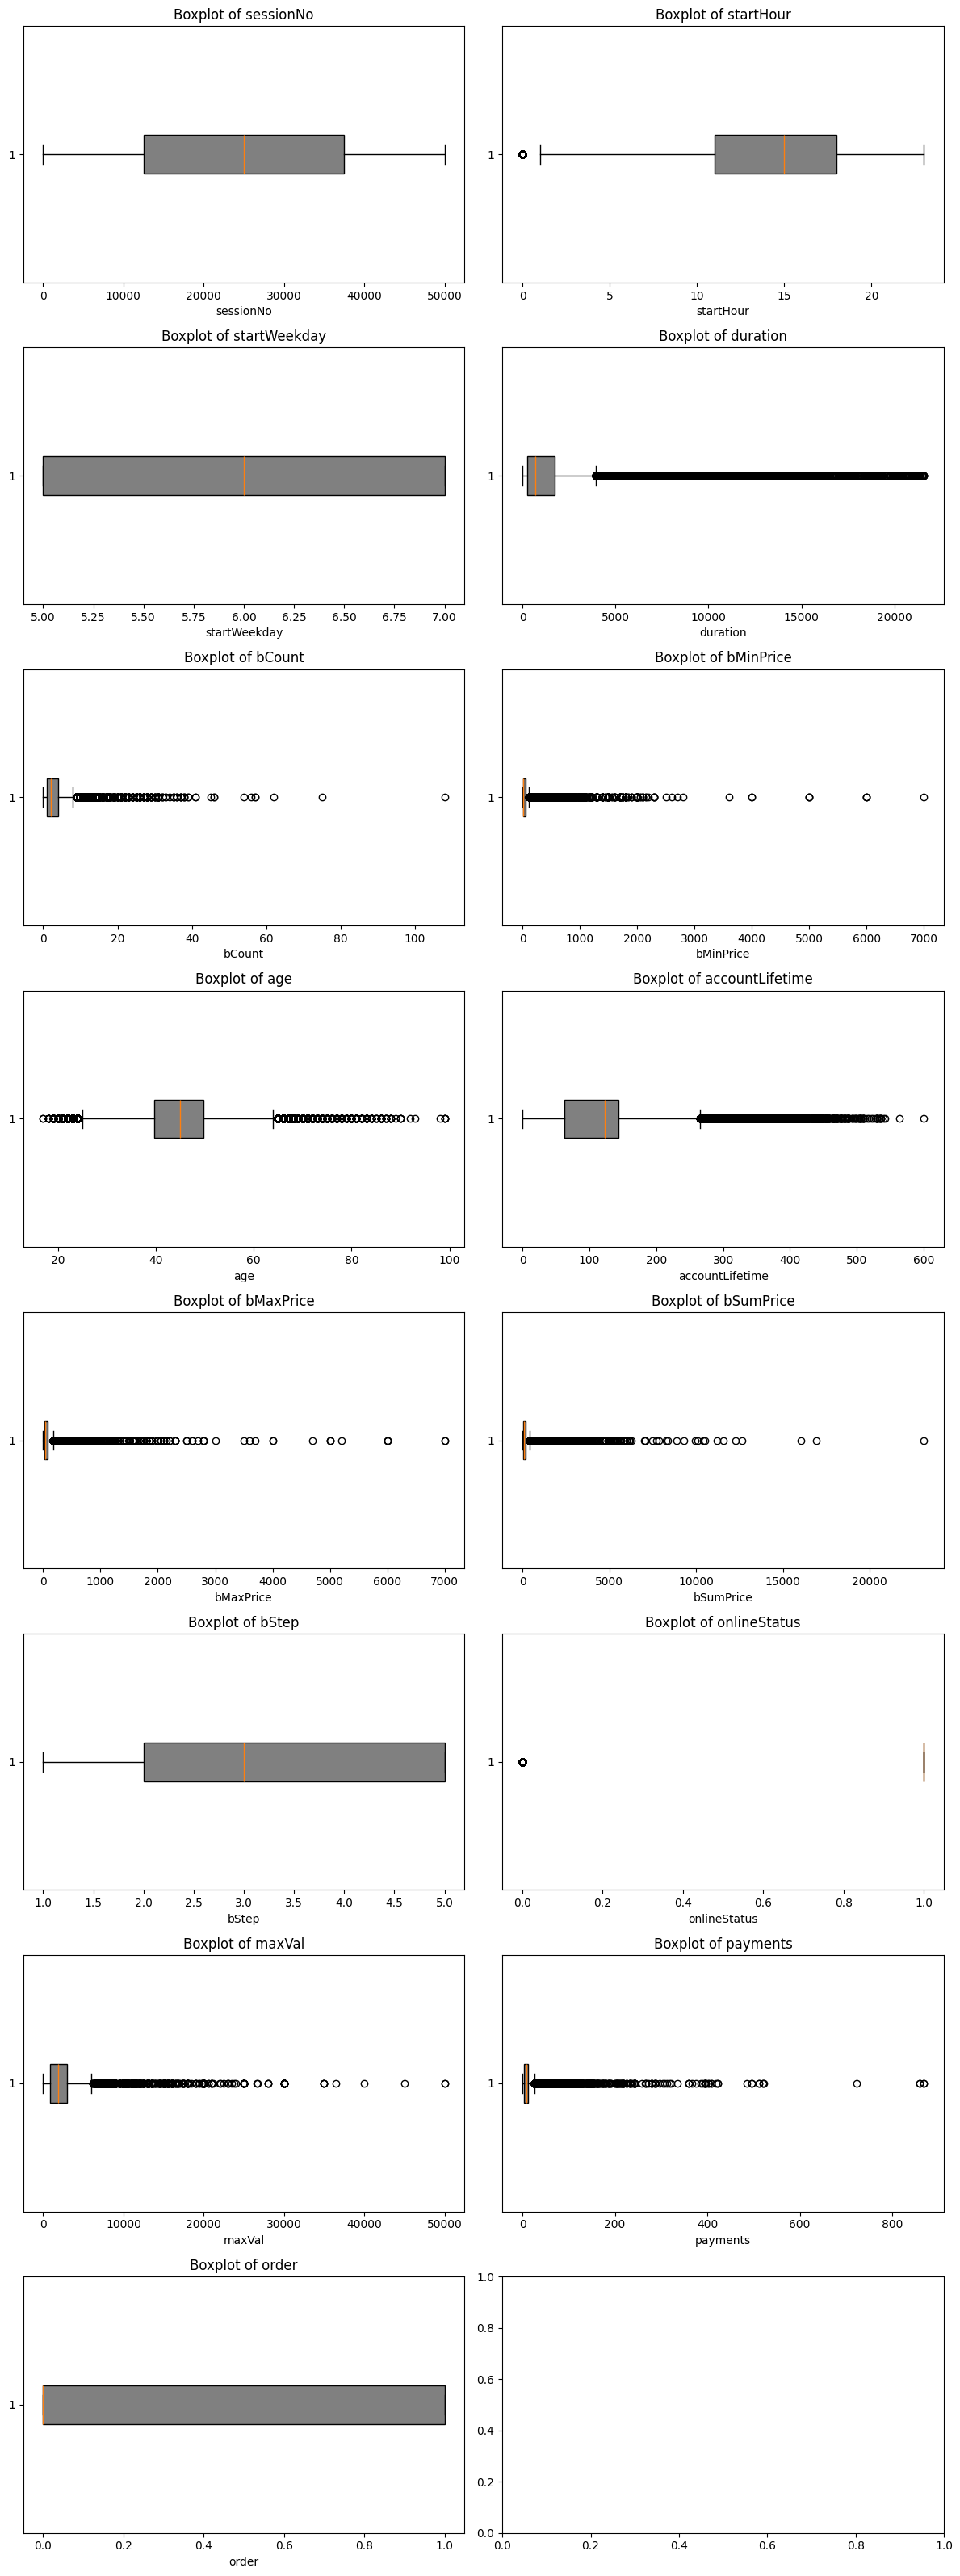

In [213]:
# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tentukan jumlah baris dan kolom untuk grid
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Ukuran plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # Ubah ke array 1D untuk iterasi yang mudah

# Loop melalui setiap kolom numerik dan plot boxplot
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='gray', color='black'))
    ax.set_title(f"Boxplot of {col}")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

#### **Analisis**

terdapat beberapa kolom dengan nilai yang sangat tinggi dibandingkan dengan nilai lainnya, seperti bCount, bMinPrice, bMaxPrice, bSumPrice, maxVal, dan payments

1. **Kolom: bCount**

    Nilai yang sangat tinggi (di atas 50) terlihat pada boxplot, dengan banyak outlier yang jauh lebih tinggi.
    
    Outlier ini bisa jadi mencerminkan kasus di mana pengguna menambah banyak produk ke dalam keranjang, yang bisa jadi valid, terutama untuk produk dengan harga rendah atau diskon besar. Sebagai contoh, jika ada promo yang mengizinkan pengguna membeli banyak produk sekaligus, maka bCount tinggi mungkin valid.

2. **Kolom: bMinPrice, bMaxPrice, bSumPrice**

    Boxplot menunjukkan bahwa ada produk dengan harga sangat tinggi (di atas 5000 untuk beberapa entri).

    Nilai-nilai harga yang sangat tinggi bisa mencerminkan produk premium atau kategori barang mewah (misalnya, elektronik, barang mewah, atau tiket perjalanan mahal). Jika produk tersebut valid, outlier ini justru memberikan informasi yang berharga mengenai jenis transaksi tertentu.
    bSumPrice yang tinggi berhubungan langsung dengan jumlah produk (bCount) yang dibeli dan harga satuan produk tersebut. Outlier pada bSumPrice dapat menunjukkan pembelian besar-besaran, yang sering kali ditemukan pada transaksi grosir atau pembelian diskon.

3. **Kolom: maxVal**

    Ada banyak nilai yang sangat tinggi dalam boxplot, dengan rentang sampai 50.000.

    Outlier ini bisa jadi berasal dari transaksi dengan kredit sangat besar atau pembayaran yang sangat tinggi. Mungkin ada beberapa kasus pengguna yang melakukan pembayaran atau transaksi besar dengan menggunakan metode pembayaran khusus (misalnya, pinjaman besar atau pembelian barang bernilai tinggi). Jika ini adalah data valid, outlier tersebut bisa menunjukkan pengguna dengan daya beli tinggi atau transaksi dalam jumlah besar.

4. **Kolom: payments**

    Boxplot menunjukkan banyak nilai yang sangat tinggi (sampai 800) dibandingkan dengan nilai lainnya.

    Pembayaran yang tinggi bisa terkait dengan transaksi besar, produk premium, atau pembayaran tunggal untuk jumlah produk yang lebih banyak. Outlier ini juga bisa mencerminkan kesalahan dalam pencatatan data (misalnya, kesalahan entri atau transaksi yang tidak sah). Namun, jika data ini valid, outlier ini mungkin relevan untuk analisis pengguna dengan kemampuan transaksi yang lebih tinggi.

#### ***bCount***

In [214]:
df[df['bCount']>50]

,sessionNo,startHour,startWeekday,duration,bCount,bMinPrice,age,accountLifetime,bMaxPrice,bSumPrice,bStep,onlineStatus,maxVal,payments,order,availability_completely orderable,address_1.0,address_2.0
8775,1130,8,5,2955.236,57,5.99,49.2,123.3,599.99,2138.46,5.0,1.0,2950.0,32.1,1,True,False,False
77904,9397,16,5,8281.584,56,9.99,44.0,158.1,499.99,3541.22,5.0,1.0,7470.0,38.8,1,False,False,False
83610,10059,16,5,18604.574,108,3.99,50.0,117.0,1499.99,3245.97,5.0,1.0,15000.0,71.0,1,True,False,True
100712,12020,18,5,4231.696,75,3.99,61.0,53.0,899.99,2027.89,5.0,1.0,1900.0,68.0,1,True,False,True
117194,13912,19,5,4394.320,54,1.00,50.0,292.0,79.99,988.52,5.0,1.0,5000.0,14.0,1,True,False,True
171093,20512,10,6,20380.671,57,7.00,45.0,27.0,49.99,104.99,5.0,1.0,10000.0,395.0,1,False,True,False
309877,35993,0,7,4405.423,62,19.95,49.2,123.3,229.99,3236.63,5.0,1.0,2950.0,32.1,1,True,False,False


##### ***bMaxPrice***

In [215]:
df[df['bMaxPrice']>3000]

,sessionNo,startHour,startWeekday,duration,bCount,bMinPrice,age,accountLifetime,bMaxPrice,bSumPrice,bStep,onlineStatus,maxVal,payments,order,availability_completely orderable,address_1.0,address_2.0
4367,608,7,5,359.288,1,5999.99,49.600000,143.400000,5999.99,5999.99,4.0,1.0,1900.000000,6.800000,0,True,False,False
35529,4269,11,5,271.953,1,5999.99,49.600000,143.400000,5999.99,5999.99,4.0,1.0,1900.000000,6.800000,0,True,False,False
35719,4291,11,5,383.474,1,5999.99,49.200000,123.300000,5999.99,5999.99,5.0,1.0,2950.000000,32.100000,0,True,False,False
76636,9242,16,5,3406.924,14,8.99,48.000000,42.000000,4699.00,4953.60,3.0,1.0,3400.000000,14.000000,0,False,False,True
107501,12766,19,5,1042.300,1,4999.99,47.900000,159.900000,4999.99,4999.99,3.0,1.0,2520.000000,7.100000,0,True,False,False
120838,14354,20,5,131.193,1,4999.99,39.700000,62.300000,4999.99,4999.99,2.0,1.0,870.000000,3.800000,0,True,False,False
131436,15522,20,5,89.063,1,3999.99,44.921048,128.169304,3999.99,3999.99,3.0,1.0,2266.582859,12.893535,0,False,False,False
145236,17142,22,5,930.802,3,14.99,53.000000,362.000000,6999.99,7049.97,1.0,1.0,2200.000000,11.000000,0,True,False,True
148405,17470,23,5,1518.676,1,4999.99,41.800000,78.400000,4999.99,4999.99,1.0,0.0,1100.000000,13.700000,0,False,False,False
150581,17774,23,5,40.821,1,3999.99,44.921048,128.169304,3999.99,3999.99,3.0,1.0,2266.582859,12.893535,0,False,False,False


##### ***payments***

In [216]:
df[df['payments']>400]

,sessionNo,startHour,startWeekday,duration,bCount,bMinPrice,age,accountLifetime,bMaxPrice,bSumPrice,bStep,onlineStatus,maxVal,payments,order,availability_completely orderable,address_1.0,address_2.0
396,55,6,5,46.495,3,5.00,54.0,183.0,5.00,15.00,4.0,1.0,20000.0,722.0,0,False,True,False
4504,626,7,5,885.340,3,4.99,53.0,376.0,299.99,604.97,5.0,1.0,10200.0,496.0,1,True,True,False
20427,2496,10,5,2942.934,1,9.20,55.0,213.0,9.20,9.20,5.0,1.0,45000.0,486.0,1,True,True,False
32061,3880,11,5,634.853,6,9.99,50.0,61.0,49.99,185.94,4.0,1.0,25000.0,859.0,0,True,True,False
32403,3919,11,5,17032.112,10,3.00,40.0,22.0,649.99,993.93,5.0,1.0,10000.0,419.0,1,True,True,False
45579,5463,12,5,6555.384,33,1.00,53.0,70.0,29.99,312.83,5.0,1.0,35000.0,521.0,1,True,False,True
50336,6032,13,5,202.006,2,4.99,53.0,376.0,39.99,44.98,5.0,1.0,10200.0,496.0,1,True,True,False
61601,7399,14,5,150.834,1,17.99,55.0,213.0,17.99,17.99,5.0,1.0,5500.0,423.0,1,True,False,True
74556,8983,15,5,102.802,1,18.99,43.0,130.0,18.99,18.99,5.0,1.0,20000.0,511.0,1,True,False,True
90290,10846,17,5,693.422,2,4.99,52.0,78.0,9.99,14.98,5.0,1.0,20000.0,401.0,1,True,False,True


##### ***maxVal***

In [217]:
df[df['maxVal']>30000]

,sessionNo,startHour,startWeekday,duration,bCount,bMinPrice,age,accountLifetime,bMaxPrice,bSumPrice,bStep,onlineStatus,maxVal,payments,order,availability_completely orderable,address_1.0,address_2.0
11714,1500,9,5,7881.180,9,9.99,41.0,60.0,39.99,181.91,5.0,1.0,30000.0,102.0,1,True,False,True
18246,2259,9,5,2801.819,1,39.99,56.0,123.0,39.99,39.99,3.0,1.0,30000.0,186.0,0,True,False,True
20427,2496,10,5,2942.934,1,9.20,55.0,213.0,9.20,9.20,5.0,1.0,45000.0,486.0,1,True,True,False
45579,5463,12,5,6555.384,33,1.00,53.0,70.0,29.99,312.83,5.0,1.0,35000.0,521.0,1,True,False,True
67752,8142,15,5,12777.947,2,16.99,41.0,60.0,29.99,46.98,5.0,1.0,30000.0,102.0,1,True,False,True
73159,8807,15,5,4858.418,1,39.90,55.0,218.0,39.90,39.90,5.0,1.0,35000.0,121.0,1,True,True,False
84758,10188,16,5,4528.440,14,9.99,38.0,15.0,29.99,255.79,5.0,1.0,30000.0,390.0,1,True,False,True
93121,11154,17,5,83.157,1,29.99,52.0,129.0,29.99,29.99,5.0,1.0,30000.0,88.0,1,True,True,False
118416,14061,19,5,138.409,1,39.99,70.0,10.0,39.99,39.99,2.0,1.0,50000.0,139.0,0,True,True,False
126386,14962,20,5,1264.713,10,6.99,50.0,121.0,59.99,256.91,5.0,1.0,30000.0,164.0,1,True,True,False


data data diatas nampak valid, sehingga kita tidak perlu melakukan penghapusan atau capping, salah satu solusinya adalah melakukan transformasi log, atau menggunakan model yang lebih tahan terhadap data skewed seperti RandomForest dan XGBoost

## **Data Analysis (visualization)**

### **distribusi data**

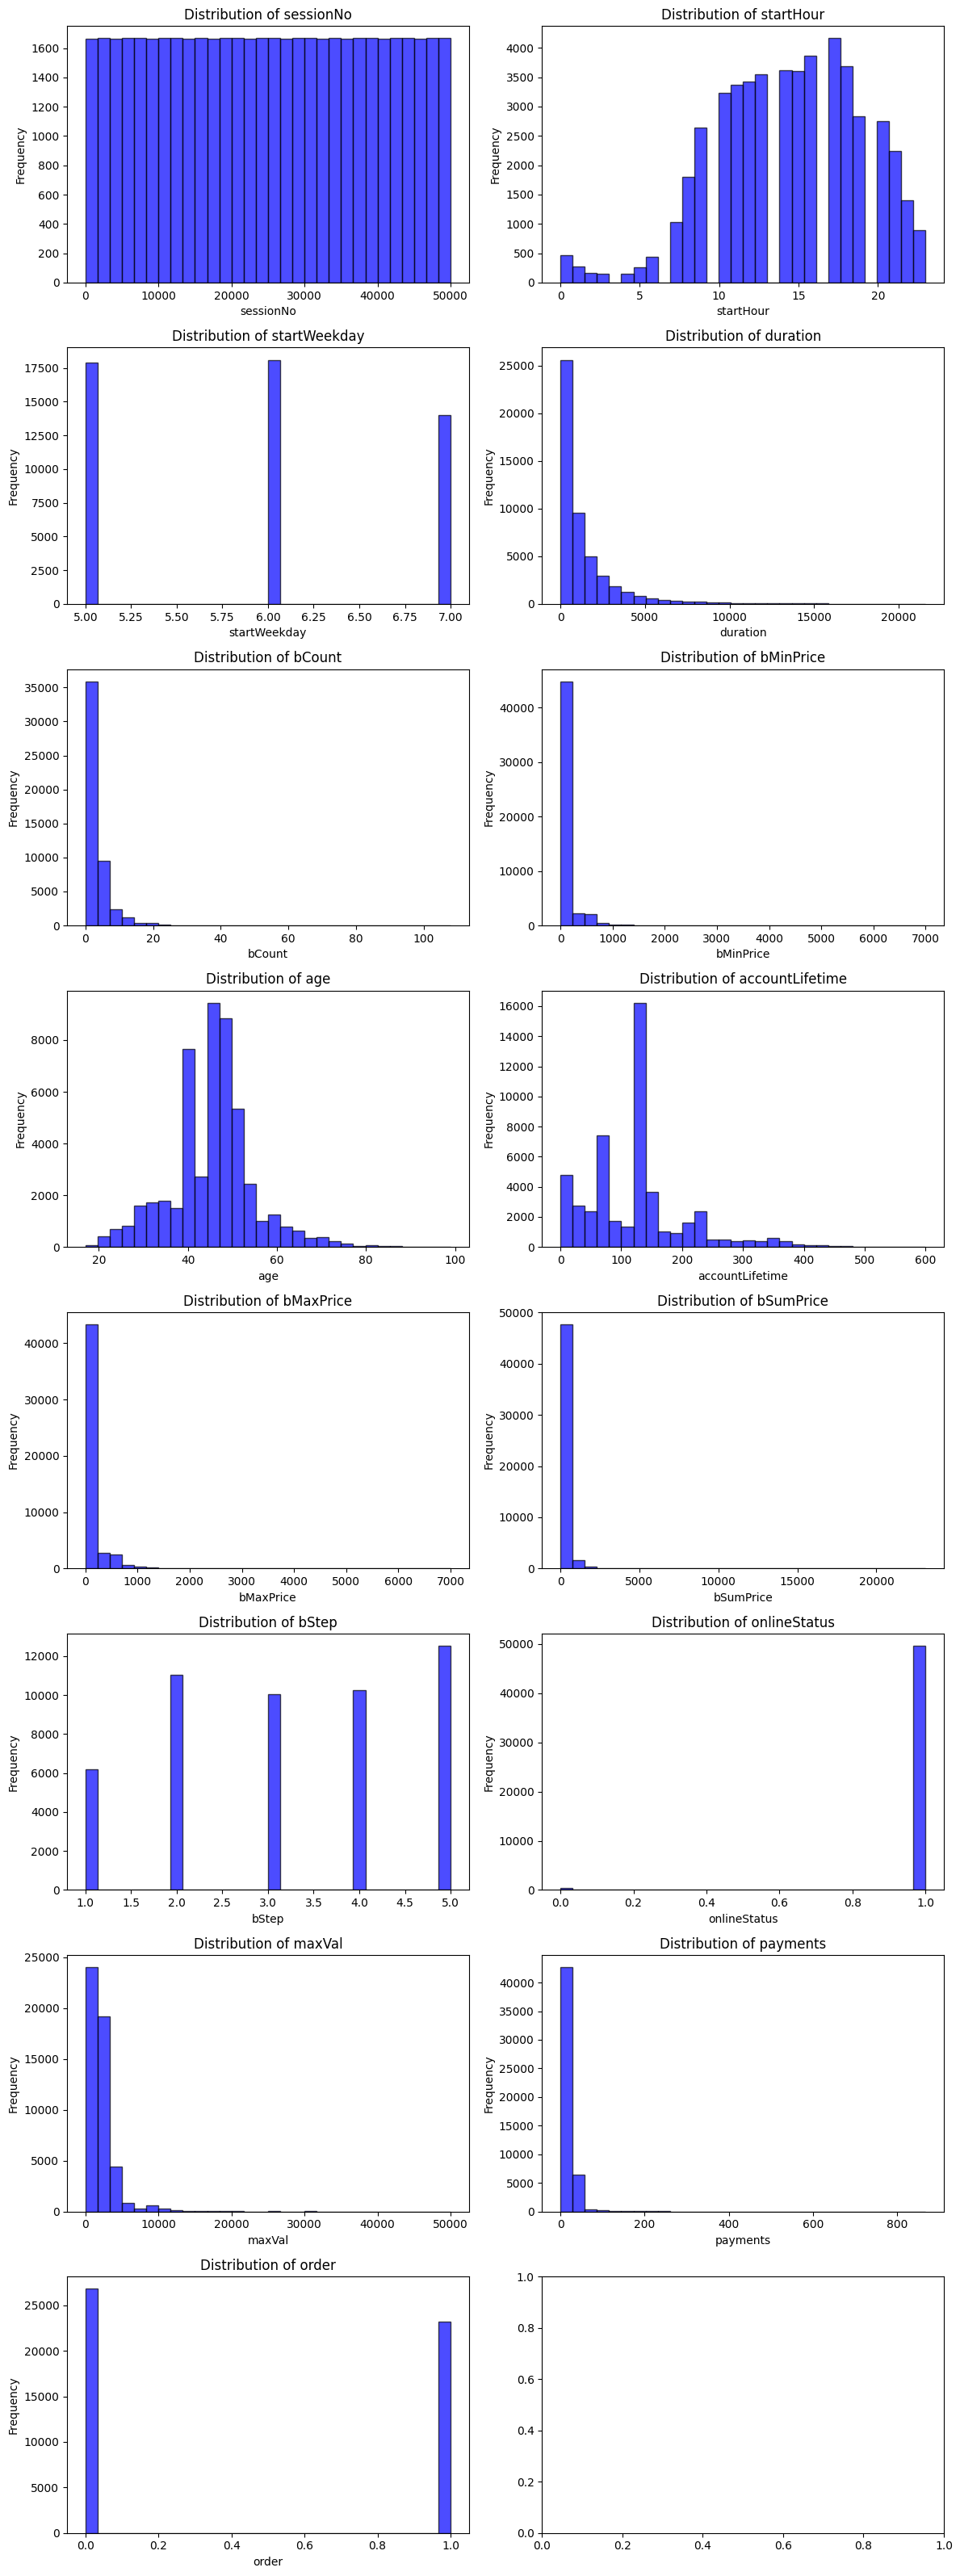

In [218]:
# Kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tentukan jumlah baris dan kolom untuk grid
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Ukuran plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # Ubah menjadi array 1D untuk iterasi yang mudah

# Loop melalui setiap kolom numerik dan plot
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(df[col].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


- Sebagian besar data memiliki distribusi yang miring ke kanan, menunjukkan bahwa aktivitas atau nilai tertinggi hanya dilakukan oleh sebagian kecil pelanggan.

- Outlier terlihat pada kolom seperti duration, maxVal, dan payments. Outlier ini perlu dianalisis lebih lanjut untuk menentukan apakah harus dihapus, diolah, atau dianggap relevan.

- Kolom seperti startHour dan startWeekday menunjukkan pola yang sesuai dengan perilaku belanja pelanggan, seperti aktivitas tinggi di sore hari dan akhir pekan.

- Kolom numerik seperti bCount, bSumPrice, dan maxVal memberikan informasi penting tentang kebiasaan belanja pelanggan yang mungkin relevan untuk segmentasi atau prediksi.

### **Order berdasarkan Jam**

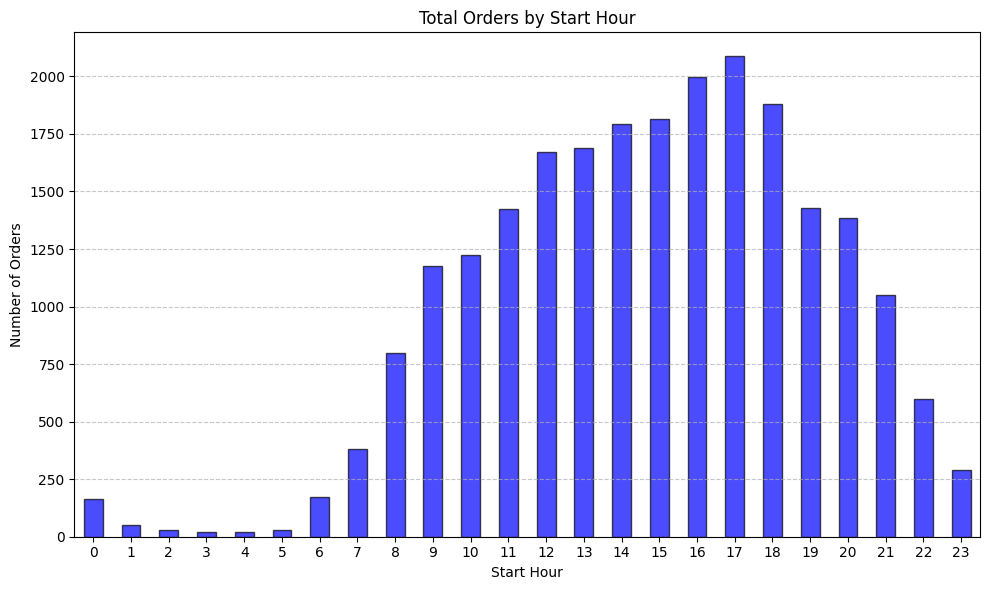

In [219]:
# Grupkan data berdasarkan `startHour` dan hitung jumlah `order`
orders_by_hour = df.groupby('startHour')['order'].sum()

# Plot data
plt.figure(figsize=(10, 6))
orders_by_hour.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title('Total Orders by Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Analisis Hasil Plot**

- **Distribusi Order Berdasarkan Jam Mulai (startHour)**
    
    Dari grafik, terlihat bahwa jumlah order mulai meningkat secara signifikan sekitar pukul 7:00 pagi.
    Jumlah order mencapai puncaknya pada pukul 16:00 hingga 18:00, menunjukkan bahwa ini adalah periode aktivitas belanja online tertinggi.
    Setelah pukul 18:00, jumlah order mulai menurun, tetapi masih cukup tinggi hingga pukul 20:00.
    Aktivitas order hampir tidak ada atau sangat rendah dari pukul 0:00 hingga 5:00 pagi, menunjukkan bahwa ini adalah periode aktivitas belanja yang minim.

- **Jam dengan Aktivitas Tertinggi**

    Aktivitas puncak terjadi di sore hari (jam 16:00–18:00), yang kemungkinan disebabkan oleh waktu istirahat atau selesai bekerja bagi pelanggan.

- **Jam dengan Aktivitas Terendah**

    Aktivitas hampir tidak ada pada jam tengah malam hingga dini hari (jam 0:00–6:00). Hal ini wajar karena sebagian besar pelanggan mungkin sedang beristirahat.

#### **Rekomendasi atau Insight**

- **Strategi Promosi:**

    Fokuskan promosi, diskon, atau kampanye pada jam-jam puncak, khususnya di sore hari antara pukul 16:00 hingga 18:00.
    Dorong lebih banyak aktivitas di pagi hari atau menjelang tengah malam dengan menawarkan promosi spesial pada jam tersebut.


- **Optimalisasi Operasional:**

    Pastikan sumber daya (seperti staf, server, atau pengiriman) tersedia dengan baik pada periode jam puncak (16:00–18:00).
    Perhatikan kapasitas sistem untuk menangani lonjakan order pada sore hari.


Analisis lebih lanjut dapat dilakukan untuk memahami pola di akhir pekan vs hari kerja. Apakah jam sibuk ini konsisten atau hanya terjadi di waktu tertentu.

### **Hubungan maxVal dengan Payments**

kami rasa maxVal dan paments seharusnya memiliki korelasi tertentu, karena itu kami melakukan analisis lebih lanjut terkait 2 fitur ini 

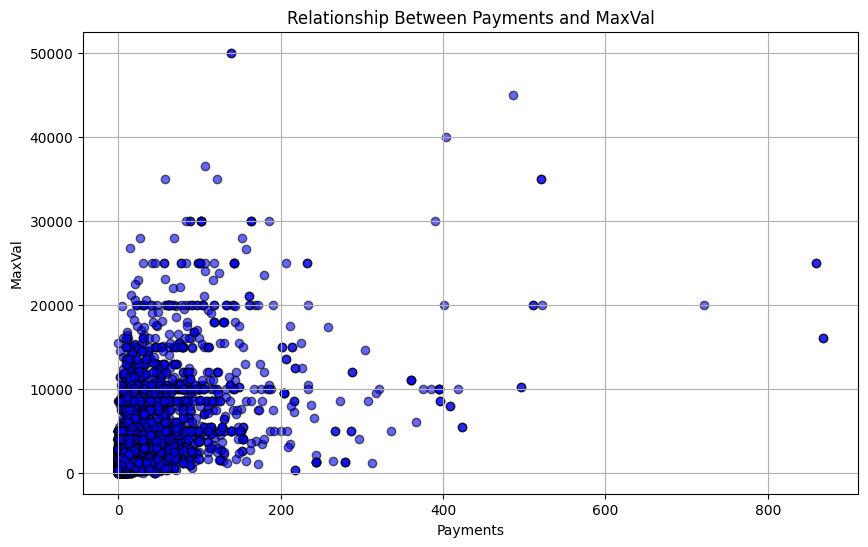

korelasi maxVal dengan payments : 0.5158081181268237


In [220]:
# Calculate the correlation
correlation = df['maxVal'].corr(df['payments'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['payments'], df['maxVal'], alpha=0.6, color='blue', edgecolor='black')
plt.title('Relationship Between Payments and MaxVal')
plt.xlabel('Payments')
plt.ylabel('MaxVal')
plt.grid(True)
plt.show()

print("korelasi maxVal dengan payments :", correlation)

#### **hasil analisis**

**Korelasi**: Nilai korelasi antara maxVal (budget maksimum) dan payments (jumlah pembayaran) adalah 0.516, menunjukkan hubungan positif moderat. Artinya, semakin tinggi jumlah pembayaran, semakin besar kemungkinan budget maksimum pelanggan.

**Visualisasi**:
Sebagian besar data terkonsentrasi pada payments rendah (di bawah 200) dan maxVal kecil (di bawah 10.000).
Ada beberapa outlier di area payments tinggi (di atas 400) dan maxVal tinggi (di atas 20.000).

#### **Segmentasi pelanggan**

kami melakukan segmentasi pelanggan berasarkan maxVal dan payments menggunakan metode KMeans

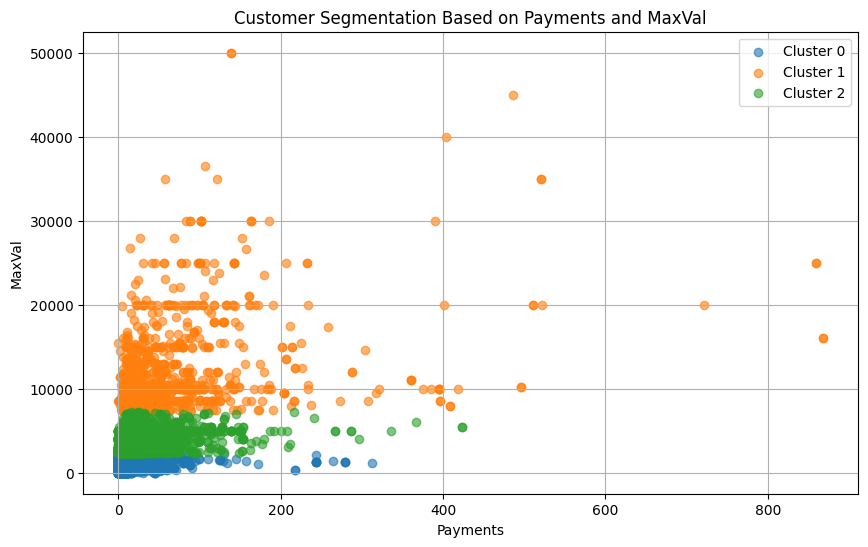

,maxVal,payments
0,1222.912949,8.021946
1,11083.480427,57.166263
2,3331.937483,21.450040


In [221]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare the data for clustering
data_for_clustering = df[['maxVal', 'payments']].dropna()  # Remove missing values

# Perform KMeans clustering to segment customers
kmeans = KMeans(n_clusters=3, random_state=42)  # Choosing 3 clusters as a starting point
kmeans.fit(data_for_clustering)

# Add cluster labels to the dataset
data_for_clustering['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(kmeans.labels_):
    cluster_data = data_for_clustering[data_for_clustering['Cluster'] == cluster]
    plt.scatter(cluster_data['payments'], cluster_data['maxVal'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Customer Segmentation Based on Payments and MaxVal')
plt.xlabel('Payments')
plt.ylabel('MaxVal')
plt.legend()
plt.grid(True)
plt.show()

# Display cluster centroids for insight
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['maxVal', 'payments'])
centroids_df


#### **Berdasarkan visualisasi segmentasi pelanggan dengan metode KMeans**

##### **Klasterisasi**

***Cluster 0 (Biru)***:

Pelanggan dengan payments sangat rendah (di bawah 50) dan maxVal yang juga rendah (rata-rata sekitar 1.200).
Klaster ini kemungkinan besar merepresentasikan pelanggan baru atau pelanggan dengan aktivitas pembayaran minim.

***Cluster 1 (Oranye)***:

Pelanggan dengan payments bervariasi (hingga 600+) dan maxVal yang lebih tinggi (rata-rata sekitar 11.083).
Kelompok ini bisa menjadi pelanggan yang aktif dan memiliki kemampuan belanja lebih tinggi.

***Cluster 2 (Hijau)***:
    
Pelanggan dengan payments moderat (20–200) dan maxVal menengah (rata-rata sekitar 3.332).
Segmen ini kemungkinan mencakup pelanggan reguler dengan aktivitas belanja yang stabil.



##### **Interpretasi**

Segmentasi ini memberikan gambaran yang jelas untuk mengidentifikasi pelanggan berdasarkan perilaku pembayaran dan kemampuan belanja.
Cluster 1 adalah kelompok pelanggan bernilai tinggi yang mungkin menjadi prioritas dalam strategi pemasaran.
Cluster 0 dapat diberikan penawaran khusus atau program promosi untuk meningkatkan engagement.

##### **Strategi Selanjutnya**

***Untuk Cluster 0***:
Berikan diskon atau promosi untuk meningkatkan aktivitas belanja.

***Untuk Cluster 1***:
Fokuskan pada strategi loyalitas seperti hadiah atau program VIP untuk mempertahankan mereka.

***Untuk Cluster 2***:
Jaga hubungan dengan mereka melalui komunikasi aktif dan penawaran menarik untuk meningkatkan loyalitas.

### **Tren aktivitas pelanggan**

kami ingin melihat jumlah aktivitas order pelanggan pada timeline data

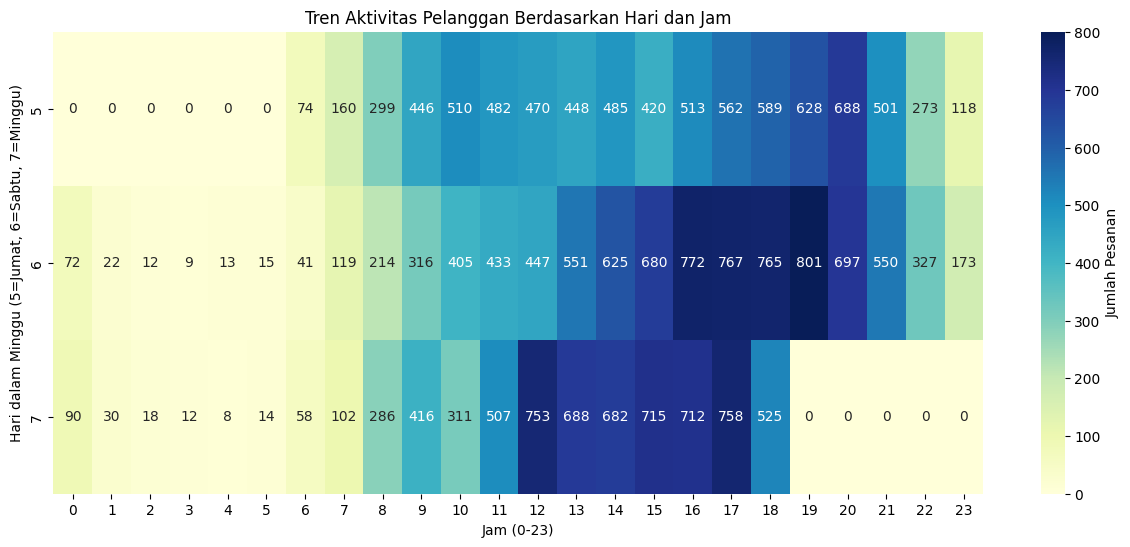

In [222]:
# Menambahkan kolom 'order' sebagai binary (1 untuk 'ya', 0 untuk 'tidak')

# Menghitung jumlah pesanan berdasarkan weekday dan hour
order_trends = df.groupby(['startWeekday', 'startHour'])['order'].sum().unstack(fill_value=0)

# Membuat heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(order_trends, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Jumlah Pesanan'})
plt.title('Tren Aktivitas Pelanggan Berdasarkan Hari dan Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Hari dalam Minggu (5=Jumat, 6=Sabtu, 7=Minggu)')
plt.show()

**Tren Aktivitas Berdasarkan Hari:**

Hari Sabtu (weekday 6) dan Minggu (weekday 7) menunjukkan jumlah pesanan yang sangat tinggi, terutama pada jam-jam tertentu, seperti jam 13.00 hingga 17.00. Ini menunjukkan bahwa pelanggan lebih aktif pada akhir pekan, terutama pada sore hari, yang dapat terkait dengan pola belanja atau kegiatan tertentu yang lebih intens di akhir pekan.

Hari Jumat (weekday 5), meskipun ada pesanan, terlihat tidak setinggi Sabtu atau Minggu. Aktivitas pada Jumat lebih rendah, terutama di jam pagi, dan meningkat sekitar jam 14.00 hingga 18.00.

**Tren Berdasarkan Jam:**

Aktivitas pesanan tertinggi terjadi antara jam 12.00 hingga 18.00 pada hari Sabtu dan Minggu, dengan puncaknya terjadi pada jam 14.00 hingga 17.00. Hal ini menunjukkan bahwa pelanggan lebih cenderung membuat pesanan pada sore hari, mungkin setelah melakukan aktivitas lainnya atau pada waktu istirahat.
Jam pagi dan malam cenderung menunjukkan aktivitas yang lebih rendah, dengan lebih banyak area yang memiliki nilai lebih rendah, terutama pada jam 1 hingga 7 pagi dan setelah jam 19.00.


**Kesimpulan Umum:**

- Akhir pekan (Sabtu dan Minggu) merupakan waktu puncak untuk pesanan, dengan pola yang menunjukkan bahwa pelanggan lebih aktif berbelanja atau membuat pesanan pada siang hingga sore hari.

- Hari kerja (Jumat) cenderung lebih sepi, namun tetap ada peningkatan pesanan sekitar sore hari, yang mungkin berkaitan dengan akhir pekan yang semakin dekat.

- Berdasarkan tren ini, strategi pemasaran atau penargetan pelanggan dapat difokuskan pada waktu-waktu puncak di akhir pekan, dengan penawaran khusus atau promosi yang berjalan di sore hari untuk menarik lebih banyak pesanan.

## **Classification**

setelah melakukan praprocessing data, dan analysis, selanjutnya kami menguji data tersebut untuk model prediksi dan melakukan prediksi kelas target pada data transact_class

### **Features selection**

field identitas seperti sessionNo dan customerNo tidak disertakan sebagai fitur yang akan digunakan untuk prediksi

In [223]:
# 1. Menentukan field numerikal, mengabaikan field identitas
non_feature = ['sessionNo', 'customerNo', 'startWeekday']  # Tambahkan field identitas lainnya jika diperlukan

pred_features = [
    col for col in df.select_dtypes(include=['float64', 'int64', 'bool']).columns 
    if col not in non_feature
]

# Pastikan 'order' tidak termasuk dalam fitur yang digunakan untuk prediksi
pred_features.remove('order')

### **Data Split**

split data untuk training dan test dengan pembagian 80:20, karena data sudah dipastikan time series dan terurut, maka kami membaginya secara terurut, 80% data awal untuk train, dan 20% sisanya untuk test

In [224]:
# 3. Menentukan fitur (X) dan target (y)
X = df[pred_features]
y = df['order']

train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### **Train Model**

melatih beberapa model untuk prediksi pada data class

#### **Random Forest Classifier**

In [225]:
# 5. Membangun dan melatih model RandomForest
rf_model = RandomForestClassifier(
    n_estimators=500,  # Jumlah pohon dalam hutan
    max_depth=6,        # Kedalaman maksimal pohon
    random_state=42,    # Menetapkan nilai acak untuk reprodusibilitas
)

rf_model.fit(X_train, y_train)

# 6. Memprediksi kelas target
y_pred_rf = rf_model.predict(X_test)

In [226]:
# 7. Evaluasi model menggunakan F1 Score
accuracy = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)  # average='weighted' untuk mempertimbangkan ketidakseimbangan kelas
class_report = classification_report(y_test, y_pred_rf)

print(f"F1 Score: {f1_rf}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

F1 Score: 0.8905660377358491
Accuracy: 0.884
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4768
           1       0.88      0.90      0.89      5232

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



#### **XGBoost Classifier**

In [227]:
# 5. Membangun dan melatih model XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,           # Jumlah pohon
    learning_rate=0.05,         # Learning rate
    max_depth=7,                # Kedalaman pohon
    subsample=0.8,              # Proporsi data yang digunakan
    colsample_bytree=0.8,       # Proporsi fitur yang digunakan
    random_state=42,            # Seed untuk konsistensi
    eval_metric='auc',          # Evaluasi berdasarkan AUC
    objective='binary:logistic' # Optimasi untuk klasifikasi biner
)

xgb_model.fit(X_train, y_train)

# 6. Memprediksi kelas target
y_pred_xgb = xgb_model.predict(X_test)

In [228]:
# 7. Evaluasi model menggunakan F1 Score
accuracy = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

print(f"F1 Score: {f1_xgb}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

F1 Score: 0.8985176738882554
Accuracy: 0.8932
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4768
           1       0.89      0.90      0.90      5232

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



#### **CatBooost Classifier**

In [229]:
# Inisialisasi model CatBoost
catboost_model = CatBoostClassifier(
    iterations=1000,        # Pelatihan dengan banyak iterasi
    learning_rate=0.1,      # Cepat belajar menengah
    depth=8,                # Pohon yang cukup dalam
    random_seed=42,         # Reproducibility
    l2_leaf_reg=5,          # Regulasi moderat
    eval_metric='Logloss',  # Optimasi untuk logloss
    bootstrap_type='Bernoulli',  # Sampling cepat untuk dataset besar
    verbose=100             # Menampilkan log setiap 100 iterasi
)


# Latih model pada data training
catboost_model.fit(X_train, y_train)

0:	learn: 0.5871981	total: 16.1ms	remaining: 16.1s
100:	learn: 0.2354218	total: 1.5s	remaining: 13.3s
200:	learn: 0.2110799	total: 3.04s	remaining: 12.1s
300:	learn: 0.1909064	total: 4.52s	remaining: 10.5s
400:	learn: 0.1738484	total: 5.99s	remaining: 8.94s
500:	learn: 0.1597012	total: 7.45s	remaining: 7.42s
600:	learn: 0.1471233	total: 8.93s	remaining: 5.93s
700:	learn: 0.1358713	total: 10.5s	remaining: 4.46s
800:	learn: 0.1260630	total: 11.9s	remaining: 2.96s
900:	learn: 0.1170944	total: 13.4s	remaining: 1.47s
999:	learn: 0.1094861	total: 14.9s	remaining: 0us


In [230]:
# Prediksi pada data uji
y_pred = catboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_cat = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"F1 Score: {f1_cat}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)


F1 Score: 0.894636744009129
Accuracy: 0.8892
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4768
           1       0.89      0.90      0.89      5232

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



keduanya menunjukkan hasil yang mirip, yaitu f-1 score 0.89

selanjutnya akan kami uji prediksi model yang telah dilatih ini pada data class

### **Test Model pada class**

duplikat data yang akan diprediksi, untuk setiap model

In [231]:
pred_test = pred.copy()

In [232]:
pred_rf = pred_test.copy()
pred_xgb =  pred_test.copy()
pred_cat =  pred_test.copy()

kami mencoba beberapa model untuk uji pada data

##### **Random Forest Classifier**

In [233]:
# 2. Menggunakan model untuk memprediksi
pred_rf['predicted_order'] = rf_model.predict(pred_rf[pred_features])

f1_score: 0.8763295099061522
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2641
           1       0.90      0.85      0.88      2470

    accuracy                           0.88      5111
   macro avg       0.89      0.88      0.88      5111
weighted avg       0.89      0.88      0.88      5111



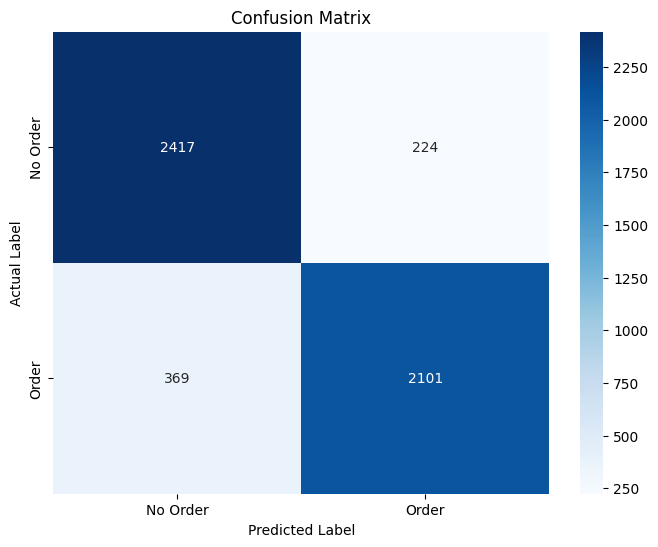

In [234]:
# 2. Menggabungkan pred dan realclass berdasarkan field sesi
comparison = pd.merge(pred_rf, realclass, on='sessionNo', suffixes=('_predicted', '_actual'))

# 3. Hitung akurasi dan metrik evaluasi lainnya
f1_rf = f1_score(comparison['predicted_order'], comparison['prediction'])
class_report = classification_report(comparison['predicted_order'], comparison['prediction'])

print(f"f1_score: {f1_rf}")
print("Classification Report:")
print(class_report)

# 4. Confusion Matrix
conf_matrix = confusion_matrix(comparison['predicted_order'], comparison['prediction'])

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Order', 'Order'], yticklabels=['No Order', 'Order'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

##### **XGBoost Classifier**

In [235]:
pred_xgb['predicted_order'] = xgb_model.predict(pred_xgb[pred_features])

f1_score: 0.8918518518518519
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2711
           1       0.91      0.88      0.89      2400

    accuracy                           0.90      5111
   macro avg       0.90      0.90      0.90      5111
weighted avg       0.90      0.90      0.90      5111



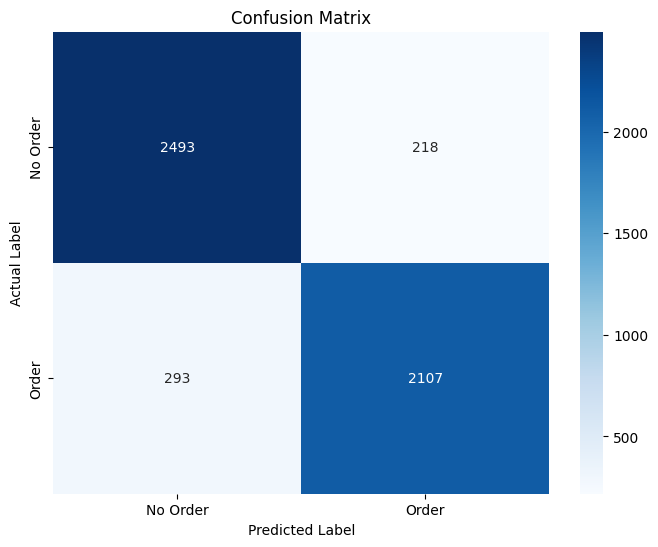

In [236]:
# 2. Menggabungkan pred dan realclass berdasarkan field sesi
comparison = pd.merge(pred_xgb, realclass, on='sessionNo', suffixes=('_predicted', '_actual'))

# 3. Hitung akurasi dan metrik evaluasi lainnya
f1_xgb = f1_score(comparison['predicted_order'], comparison['prediction'])
class_report = classification_report(comparison['predicted_order'], comparison['prediction'])

print(f"f1_score: {f1_xgb}")
print("Classification Report:")
print(class_report)

# 4. Confusion Matrix
conf_matrix = confusion_matrix(comparison['predicted_order'], comparison['prediction'])

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Order', 'Order'], yticklabels=['No Order', 'Order'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

##### **CatBoost Classifier**

In [237]:
pred_cat['predicted_order'] = catboost_model.predict(pred_cat[pred_features])

f1_score: 0.8838479311069103
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2675
           1       0.90      0.86      0.88      2436

    accuracy                           0.89      5111
   macro avg       0.89      0.89      0.89      5111
weighted avg       0.89      0.89      0.89      5111



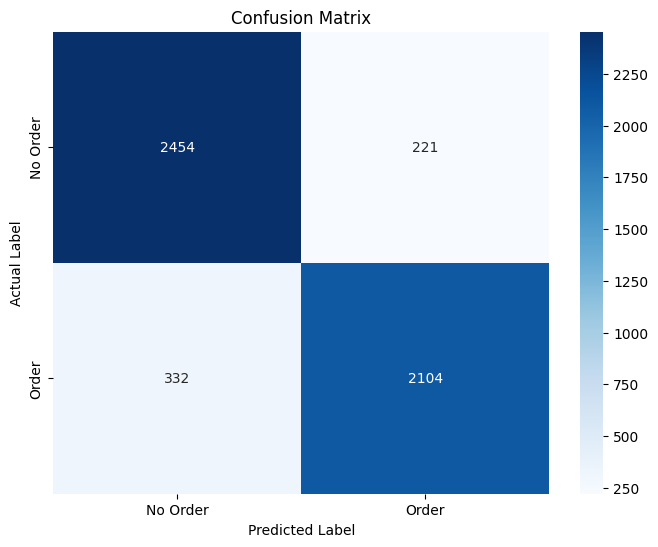

In [238]:
# 2. Menggabungkan pred dan realclass berdasarkan field sesi
comparison = pd.merge(pred_cat, realclass, on='sessionNo', suffixes=('_predicted', '_actual'))

# 3. Hitung akurasi dan metrik evaluasi lainnya
f1_xgb = f1_score(comparison['predicted_order'], comparison['prediction'])
class_report = classification_report(comparison['predicted_order'], comparison['prediction'])

print(f"f1_score: {f1_xgb}")
print("Classification Report:")
print(class_report)

# 4. Confusion Matrix
conf_matrix = confusion_matrix(comparison['predicted_order'], comparison['prediction'])

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Order', 'Order'], yticklabels=['No Order', 'Order'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### **Evaluasi**

kami mencoba RandomizedSearchCV dengan 10 fold cross-validation

In [239]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Initialize XGBClassifier
xgboost_model = XGBClassifier(
    random_state=42,
    eval_metric='auc',          # Evaluate based on AUC (or F1 Score)
    objective='binary:logistic' # Binary classification
)

# Setup RandomizedSearchCV with 10-fold Cross Validation
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_dist,
    scoring='f1',
    cv=10,
    verbose=1,
    n_jobs=-1,
    n_iter=50  # Number of random combinations to try
)

# Fit random search on the training data
random_search.fit(X_train, y_train)

# Display best parameters and corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_
best_params, best_score


Fitting 10 folds for each of 50 candidates, totalling 500 fits


({'subsample': 0.9,
  'n_estimators': 50,
  'max_depth': 10,
  'learning_rate': 0.05,
  'gamma': 0.5,
  'colsample_bytree': 0.8},
 0.8889655752197596)

lalu coba uji di data class

In [240]:
pred_xgb =  pred_test.copy()

In [241]:
pred_xgb['predicted_order'] = random_search.predict(pred_xgb[pred_features])

f1_score: 0.8874340021119325
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2701
           1       0.90      0.87      0.89      2410

    accuracy                           0.90      5111
   macro avg       0.90      0.89      0.90      5111
weighted avg       0.90      0.90      0.90      5111



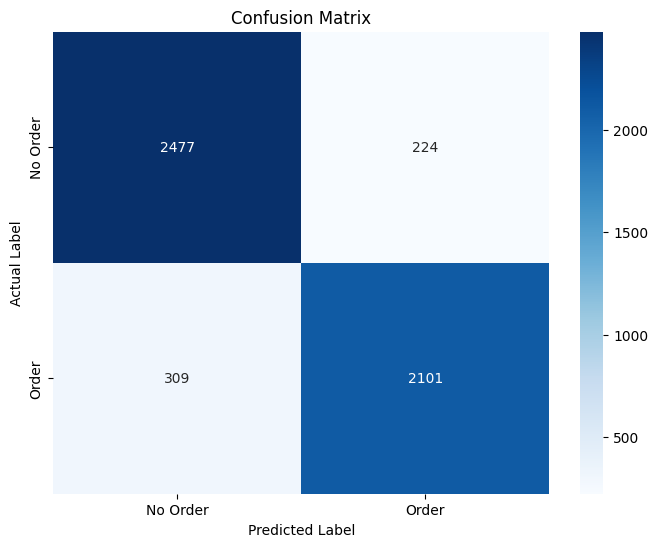

In [242]:
# 2. Menggabungkan pred dan realclass berdasarkan field sesi
comparison = pd.merge(pred_xgb, realclass, on='sessionNo', suffixes=('_predicted', '_actual'))

# 3. Hitung akurasi dan metrik evaluasi lainnya
f1_xgb = f1_score(comparison['predicted_order'], comparison['prediction'])
class_report = classification_report(comparison['predicted_order'], comparison['prediction'])

print(f"f1_score: {f1_xgb}")
print("Classification Report:")
print(class_report)

# 4. Confusion Matrix
conf_matrix = confusion_matrix(comparison['predicted_order'], comparison['prediction'])

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Order', 'Order'], yticklabels=['No Order', 'Order'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

hasilnya kurang lebih sama dengan hasil prediksi sebelumnya, bahkan sedikit menurun

## **Kesimpulan**

dengan dataset yang telah kami analisis, dan dilakukan praprosess, seperti drouping berdasarkan sesi, imputasi terhadap missing values, penanganan zero values, analisis outlier, dan lain lain, kami menggunakan 3 model untuk dilatih, yaitu RandomForest, XGBoost, dan CatBoost.

**hasil praproses**

setelah melakukan praproses, seperti drop field yang kurang relevan, hasil prediksi model relatif sama dengan model awal yang dilatih menggunakan data tanpa praproses (hanya encoding), ini mengindikasikan bahwa field yang kami drop memang kurang relevan terhadap hasil prediksi, sehingga tidak diperlukan adanya fitur fitur tersebut, penghapusan fitur itu kami anggap sukses, meskipun hasil prediksi model tidak naik secara signifikan

**Evaluasi Model Awal:**

Tiga model yang diuji, yaitu RandomForest, XGBoost, dan CatBoost, menunjukkan performa yang cukup baik dalam memprediksi data yang diuji. Nilai F1-score yang diperoleh untuk setiap model adalah:
- **RandomForest**: 0.876
- **XGBoost**: 0.891
- **CatBoost**: 0.883

XGBoost memberikan nilai F1-score tertinggi di antara ketiga model tersebut, yang menunjukkan kemampuannya untuk mengatasi masalah klasifikasi dengan baik.


**Stabilitas Model:**

Ketiga model menunjukkan hasil yang konsisten antara data pelatihan dan data kelas (test), yang mengindikasikan bahwa model tidak mengalami overfitting. Model-model ini mampu mengeneralisasi dengan baik tanpa kehilangan akurasi pada data yang tidak terlihat selama pelatihan.


**Pengujian dengan Hyperparameter Tuning:**

Setelah melakukan hyperparameter tuning dengan menggunakan 10-fold cross-validation pada model XGBoost, hasilnya tidak menunjukkan peningkatan signifikan. Bahkan, performa sedikit menurun dibandingkan dengan hasil awal yang diperoleh tanpa tuning. Hal ini mengindikasikan bahwa meskipun tuning parameter dapat meningkatkan performa dalam beberapa kasus, pada model XGBoost ini, perubahan yang dilakukan mungkin tidak memberikan manfaat besar atau bahkan dapat menyebabkan overfitting dalam beberapa iterasi tuning.


**Kesimpulan:**

Secara keseluruhan, model XGBoost tetap menjadi model terbaik di antara ketiganya berdasarkan hasil F1-score. Meskipun hyperparameter tuning pada XGBoost sedikit menurunkan performa, hal ini tidak berarti bahwa model tersebut tidak efektif. Tuning bisa saja memberikan manfaat yang lebih besar jika dilakukan dengan parameter yang lebih terarah atau dengan teknik lain seperti Grid Search atau Random Search yang lebih luas. Model XGBoost menunjukkan potensi kuat untuk digunakan lebih lanjut dalam masalah klasifikasi yang dihadapi.